# DATA PREPARATION

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
df = pd.read_csv('marketing_campaign_data.csv')

df.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
859,859,1031,1989,D3,Menikah,85710000.0,0,0,05-05-2013,5,...,2,0,0,1,0,0,0,3,11,0
1174,1174,8686,1979,SMA,Bertunangan,23724000.0,1,0,08-01-2013,65,...,8,0,0,0,0,0,0,3,11,0
675,675,6961,1974,S1,Menikah,26751000.0,2,0,22-05-2014,26,...,8,0,0,0,0,0,0,3,11,0
392,392,2669,1993,S1,Lajang,74293000.0,0,0,04-05-2014,66,...,2,0,0,0,0,0,0,3,11,0
1478,1478,5286,1987,S2,Lajang,41020000.0,0,0,28-10-2013,68,...,3,0,0,0,0,0,0,3,11,0


## Deskriptive 

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [202]:
df.iloc[:,:15].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,5524,1957,S1,Lajang,58138000.00,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000
1,2174,1954,S1,Lajang,46344000.00,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000
2,4141,1965,S1,Bertunangan,71613000.00,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000
3,6182,1984,S1,Bertunangan,26646000.00,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000
4,5324,1981,S3,Menikah,58293000.00,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000


In [203]:
df.iloc[:,15:].head()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## Feature Engineering

Sebelum memasuki EDA, kita akan membuat beberapa kolom baru untuk membantu dalam menganalisa customer.

In [204]:
#Membuat kolom "Umur"

df['Age'] = 2022-df['Year_Birth'] 

Dari kolom `Age`, kita akan mengelompokkan lagi umur ke beberapa grup sebagai berikut:<br>
- **Children** = di bawah 12 tahun<br>
- **Teen** = 12-16 tahun<br>
- **Young Adult** = 17-25 tahun<br>
- **Adult** = 26-44 tahun<br>
- **Middle Age** = 45-59 tahun<br>
- **Elderly** = 60 tahun ke atas <br><br>
(referensi kategori umur di atas menurut Departemen Kesehatan Republik Indonesia tahun 2009)

In [205]:
df['Age'].describe()

count   2240.00
mean      53.19
std       11.98
min       26.00
25%       45.00
50%       52.00
75%       63.00
max      129.00
Name: Age, dtype: float64

In [206]:
Age_Group = []

for i,kolom in df.iterrows(): #karena range umur hanya dari 26-129, maka pengelompokkan akan dimulai dari adult saja
  if kolom['Age'] < 45:
    Group = 'Adult'
  elif kolom['Age'] < 60: 
    Group = 'Middle Age'
  else:
    Group = 'Elderly'
  Age_Group.append(Group)

df['Age_Group'] = Age_Group

In [207]:
#Membuat kolom "Jumlah Anak"

df['Minorhome'] = (df['Kidhome'])+(df['Teenhome']) #walaupun ada yang belum menikah, kita tetap hitung jumlah anak di rumah yang dapat menjadi potensi tanggungan dari customer (seperti adik, keponakan, dll)

In [208]:
#Membuat kolom "Total Pengeluaran Customer"

df['Total_Spent'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [209]:
#Membuat Kolom "Total Transaksi"

df['Total_Transactions'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

#asumsi total transaksi adalah pada bulan sebelumnya

In [210]:
#Membuat Kolom "Total Campaign sebelumnya yang diterima Customer"

df['Total_AcceptedCmp'] = df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2']

Kita akan membuat kolom **Conversion Rate** yaitu jumlah transaksi yang dilakukan setiap customer melakukan visit.

In [211]:
def conv(x,y):
  if y==0:
    return 0
  else: 
    return x/y

df['Conversion_Rate'] = df.apply(lambda x: conv(x['Total_Transactions'],x['NumWebVisitsMonth']),axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Minorhome,Total_Spent,Total_Transactions,Total_AcceptedCmp,Conversion_Rate
0,5524,1957,S1,Lajang,58138000.00,0,0,04-09-2012,58,635000,...,3,11,1,65,Elderly,0,1617000,25,0,3.57
1,2174,1954,S1,Lajang,46344000.00,1,1,08-03-2014,38,11000,...,3,11,0,68,Elderly,2,27000,6,0,1.20
2,4141,1965,S1,Bertunangan,71613000.00,0,0,21-08-2013,26,426000,...,3,11,0,57,Middle Age,0,776000,21,0,5.25
3,6182,1984,S1,Bertunangan,26646000.00,1,0,10-02-2014,26,11000,...,3,11,0,38,Adult,1,53000,8,0,1.33
4,5324,1981,S3,Menikah,58293000.00,1,0,19-01-2014,94,173000,...,3,11,0,41,Adult,1,422000,19,0,3.80


In [212]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,2240.00,5592.16,3246.66,0.00,2828.25,5458.50,8427.75,11191.00
Year_Birth,2240.00,1968.81,11.98,1893.00,1959.00,1970.00,1977.00,1996.00
Income,2216.00,52247251.35,25173076.66,1730000.00,35303000.00,51381500.00,68522000.00,666666000.00
Kidhome,2240.00,0.44,0.54,0.00,0.00,0.00,1.00,2.00
Teenhome,2240.00,0.51,0.54,0.00,0.00,0.00,1.00,2.00
Recency,2240.00,49.11,28.96,0.00,24.00,49.00,74.00,99.00
MntCoke,2240.00,303935.71,336597.39,0.00,23750.00,173500.00,504250.00,1493000.00
MntFruits,2240.00,26302.23,39773.43,0.00,1000.00,8000.00,33000.00,199000.00
MntMeatProducts,2240.00,166950.00,225715.37,0.00,16000.00,67000.00,232000.00,1725000.00
MntFishProducts,2240.00,37525.45,54628.98,0.00,3000.00,12000.00,50000.00,259000.00


# Exploratory Data Analysis (EDA)

## Descriptive Statistics

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Jumlah data duplikat

In [214]:
df.duplicated().sum()

0

Jumlah missing values pada setiap kolom

In [215]:
df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
Z_Revenue               0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Response                0
NumWebVisitsMonth       0
Age                     0
Age_Group               0
Minorhome               0
Total_Spent             0
Total_Transactions      0
Total_AcceptedCmp       0
AcceptedCmp3            0
NumStorePurchases       0
Year_Birth              0
MntCoke                 0
Education               0
Marital_Status          0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntFruits               0
NumCatalogPurchases     0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
Conversion_Rate         0
dtype: int64

In [216]:
((df.isna().sum())*100/len(df)).sort_values(ascending=False)

Income                1.07
ID                    0.00
Z_Revenue             0.00
AcceptedCmp4          0.00
AcceptedCmp5          0.00
AcceptedCmp1          0.00
AcceptedCmp2          0.00
Complain              0.00
Z_CostContact         0.00
Response              0.00
NumWebVisitsMonth     0.00
Age                   0.00
Age_Group             0.00
Minorhome             0.00
Total_Spent           0.00
Total_Transactions    0.00
Total_AcceptedCmp     0.00
AcceptedCmp3          0.00
NumStorePurchases     0.00
Year_Birth            0.00
MntCoke               0.00
Education             0.00
Marital_Status        0.00
Kidhome               0.00
Teenhome              0.00
Dt_Customer           0.00
Recency               0.00
MntFruits             0.00
NumCatalogPurchases   0.00
MntMeatProducts       0.00
MntFishProducts       0.00
MntSweetProducts      0.00
MntGoldProds          0.00
NumDealsPurchases     0.00
NumWebPurchases       0.00
Conversion_Rate       0.00
dtype: float64

Hanya kolom `Income` yang memiliki nilai null.

In [217]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,2240.00,5592.16,3246.66,0.00,2828.25,5458.50,8427.75,11191.00
Year_Birth,2240.00,1968.81,11.98,1893.00,1959.00,1970.00,1977.00,1996.00
Income,2216.00,52247251.35,25173076.66,1730000.00,35303000.00,51381500.00,68522000.00,666666000.00
Kidhome,2240.00,0.44,0.54,0.00,0.00,0.00,1.00,2.00
Teenhome,2240.00,0.51,0.54,0.00,0.00,0.00,1.00,2.00
Recency,2240.00,49.11,28.96,0.00,24.00,49.00,74.00,99.00
MntCoke,2240.00,303935.71,336597.39,0.00,23750.00,173500.00,504250.00,1493000.00
MntFruits,2240.00,26302.23,39773.43,0.00,1000.00,8000.00,33000.00,199000.00
MntMeatProducts,2240.00,166950.00,225715.37,0.00,16000.00,67000.00,232000.00,1725000.00
MntFishProducts,2240.00,37525.45,54628.98,0.00,3000.00,12000.00,50000.00,259000.00


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [219]:
out = ['ID','Dt_Customer'] #tidak ikut dikelompokkan
nums = []
cats = ['Education','Marital_Status','Age_Group','Complain','Response']

for x in df.columns:
  if ((x not in cats) and (x not in out)):
    nums.append(x)

### Numerical Data

In [220]:
df[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.00,1968.81,11.98,1893.00,1959.00,1970.00,1977.00,1996.00
Income,2216.00,52247251.35,25173076.66,1730000.00,35303000.00,51381500.00,68522000.00,666666000.00
Kidhome,2240.00,0.44,0.54,0.00,0.00,0.00,1.00,2.00
Teenhome,2240.00,0.51,0.54,0.00,0.00,0.00,1.00,2.00
Recency,2240.00,49.11,28.96,0.00,24.00,49.00,74.00,99.00
MntCoke,2240.00,303935.71,336597.39,0.00,23750.00,173500.00,504250.00,1493000.00
MntFruits,2240.00,26302.23,39773.43,0.00,1000.00,8000.00,33000.00,199000.00
MntMeatProducts,2240.00,166950.00,225715.37,0.00,16000.00,67000.00,232000.00,1725000.00
MntFishProducts,2240.00,37525.45,54628.98,0.00,3000.00,12000.00,50000.00,259000.00
MntSweetProducts,2240.00,27062.95,41280.50,0.00,1000.00,8000.00,33000.00,263000.00


### Categorical Data

In [221]:
(df[cats].astype(str)).describe().transpose()

,count,unique,top,freq
Education,2240,5,S1,1127
Marital_Status,2240,6,Menikah,864
Age_Group,2240,3,Middle Age,987
Complain,2240,2,0,2219
Response,2240,2,0,1906


In [222]:
for col in cats:
  print(f'Value count column {col}:')
  print(df[col].value_counts())
  print()

Value count column Education:
S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: Education, dtype: int64

Value count column Marital_Status:
Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: Marital_Status, dtype: int64

Value count column Age_Group:
Middle Age    987
Elderly       699
Adult         554
Name: Age_Group, dtype: int64

Value count column Complain:
0    2219
1      21
Name: Complain, dtype: int64

Value count column Response:
0    1906
1     334
Name: Response, dtype: int64



## Uninvariate Analysis

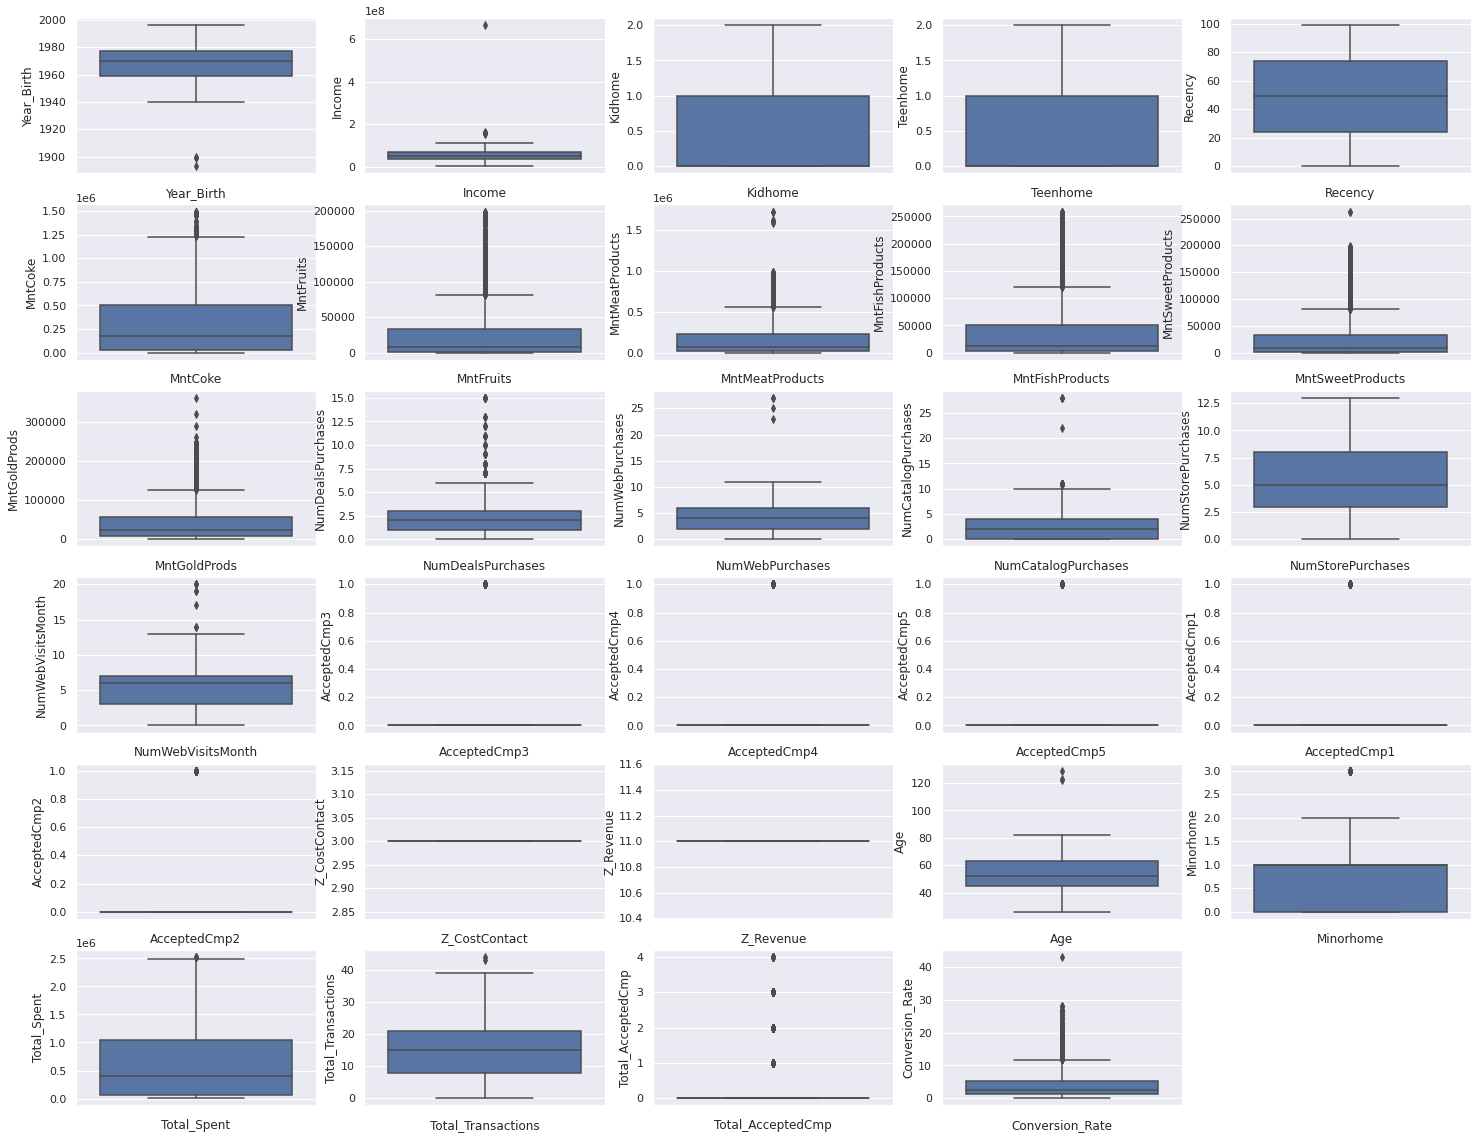

In [223]:
plt.figure(figsize=(25,20))

for i in range(0,len(nums)):
      plt.subplot(6,5,i+1)
      sns.boxplot(y=df[nums[i]],orient='v')
      plt.xlabel(nums[i])

Pada kolom `Age`, terdapat outlier yang cukup tidak wajar yaitu pada umur 100 ke atas. Data tersebut akan dihapus.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


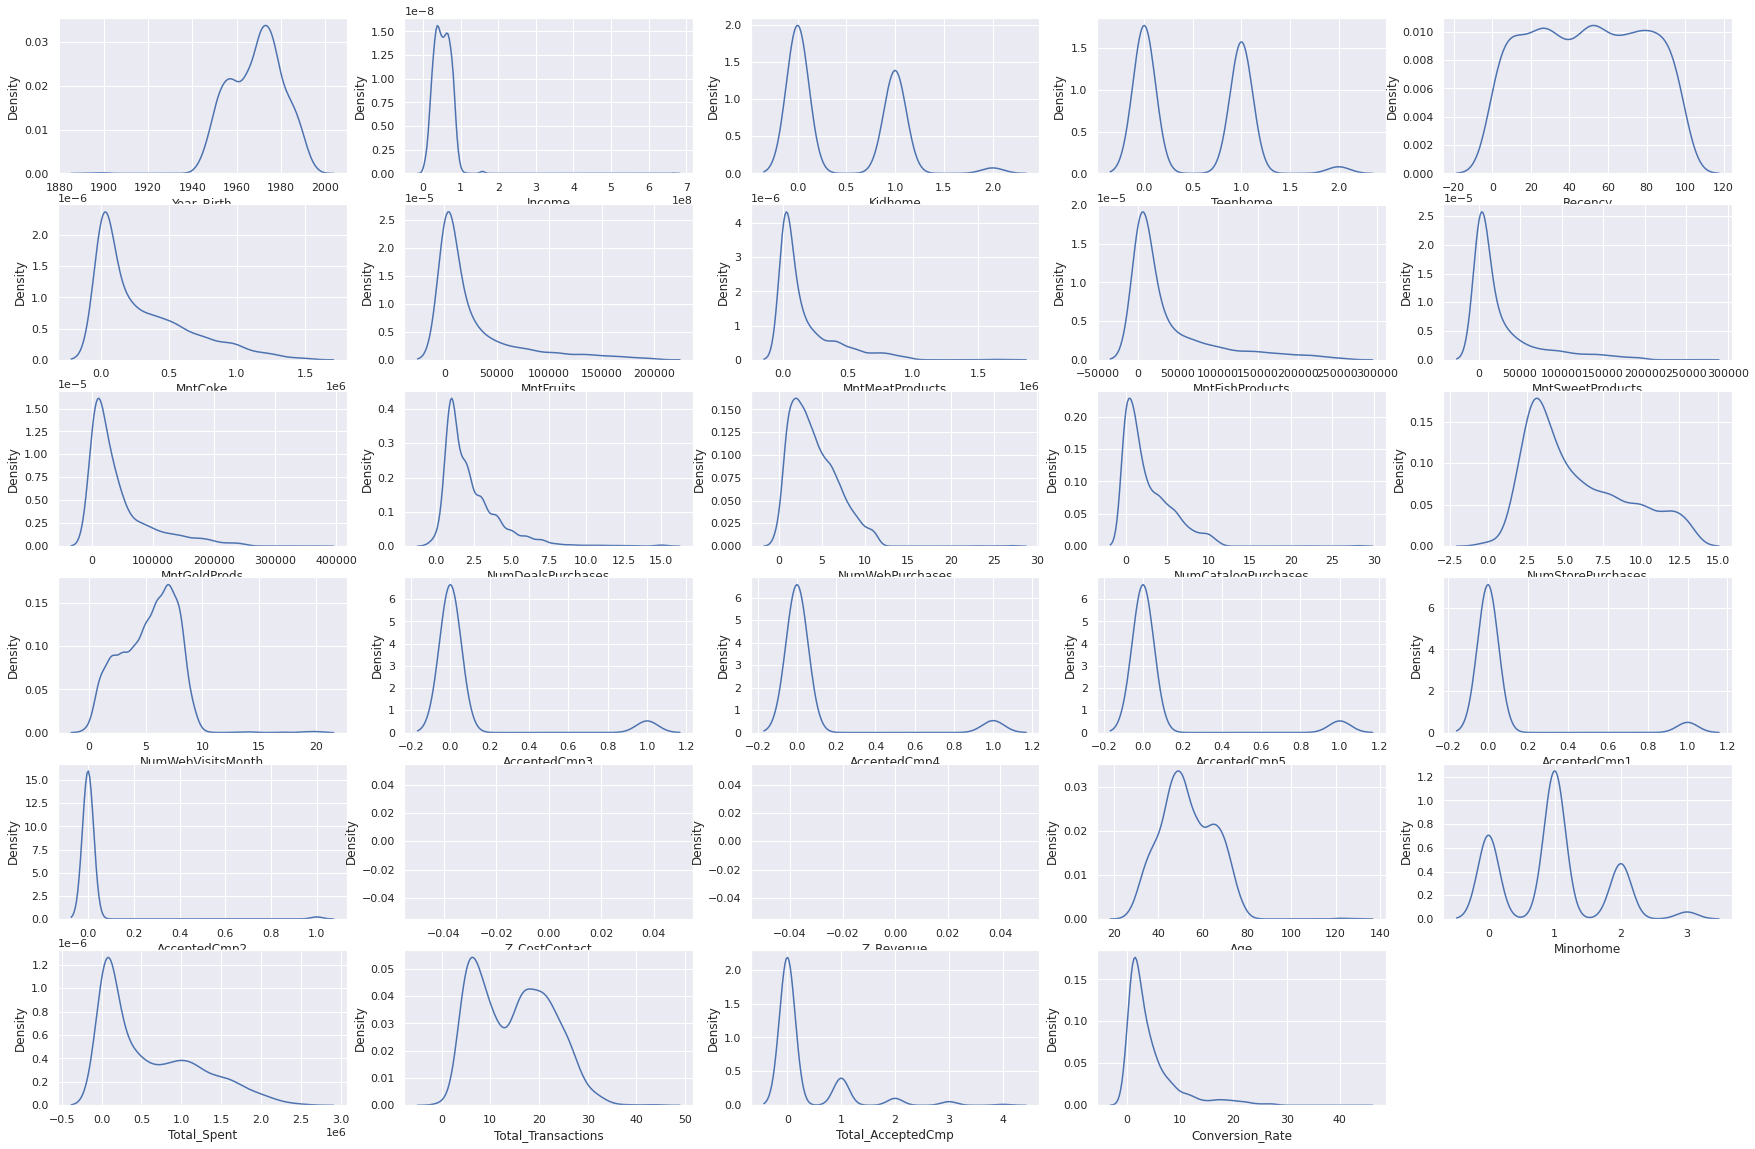

In [224]:
plt.figure(figsize=(30,20))

for i in range(0,len(nums)):
      plt.subplot(6,5,i+1)
      sns.kdeplot(x=df[nums[i]])
      plt.xlabel(nums[i])

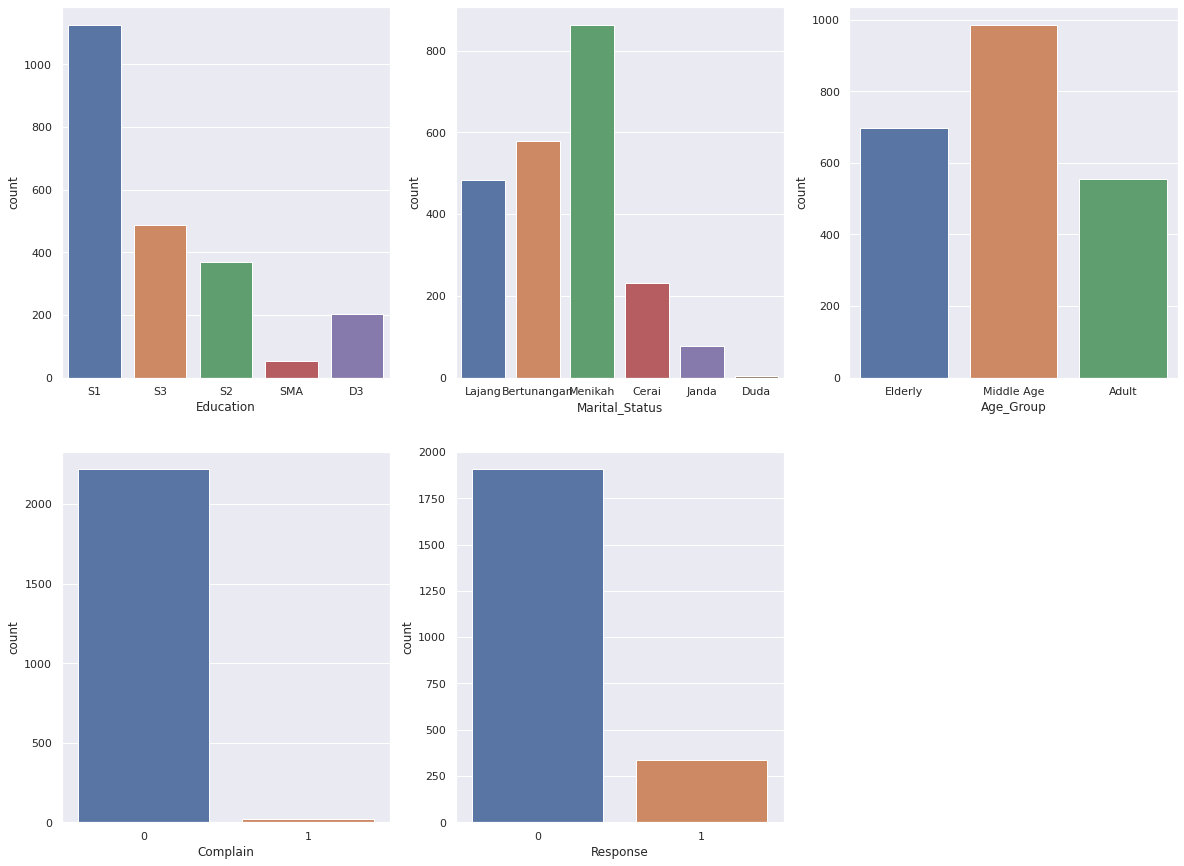

In [225]:
plt.figure(figsize=(20,15))

for i in range(0,len(cats)):
      plt.subplot(2,3,i+1)
      sns.countplot(x=df[cats[i]])
      plt.xlabel(cats[i])

## Multivariate Analysis

In [226]:
df.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Minorhome,Total_Spent,Total_Transactions,Total_AcceptedCmp,Conversion_Rate
ID,1.00,0.00,0.01,0.00,-0.00,-0.05,-0.02,0.00,-0.00,-0.02,...,0.03,NaN,NaN,-0.02,-0.00,-0.00,-0.02,-0.02,-0.04,0.00
Year_Birth,0.00,1.00,-0.16,0.23,-0.35,-0.02,-0.16,-0.02,-0.03,-0.04,...,-0.03,NaN,NaN,0.02,-1.00,-0.09,-0.11,-0.17,-0.00,-0.09
Income,0.01,-0.16,1.00,-0.43,0.02,-0.00,0.58,0.43,0.58,0.44,...,-0.03,NaN,NaN,0.13,0.16,-0.29,0.67,0.57,0.31,0.54
Kidhome,0.00,0.23,-0.43,1.00,-0.04,0.01,-0.50,-0.37,-0.44,-0.39,...,0.04,NaN,NaN,-0.08,-0.23,0.69,-0.56,-0.48,-0.21,-0.45
Teenhome,-0.00,-0.35,0.02,-0.04,1.00,0.02,0.00,-0.18,-0.26,-0.20,...,0.00,NaN,NaN,-0.15,0.35,0.70,-0.14,0.13,-0.13,-0.20
Recency,-0.05,-0.02,-0.00,0.01,0.02,1.00,0.02,-0.00,0.02,0.00,...,0.01,NaN,NaN,-0.20,0.02,0.02,0.02,0.01,-0.01,0.00
MntCoke,-0.02,-0.16,0.58,-0.50,0.00,0.02,1.00,0.39,0.56,0.40,...,-0.04,NaN,NaN,0.25,0.16,-0.35,0.89,0.71,0.51,0.44
MntFruits,0.00,-0.02,0.43,-0.37,-0.18,-0.00,0.39,1.00,0.54,0.59,...,-0.01,NaN,NaN,0.13,0.02,-0.39,0.61,0.46,0.16,0.48
MntMeatProducts,-0.00,-0.03,0.58,-0.44,-0.26,0.02,0.56,0.54,1.00,0.57,...,-0.02,NaN,NaN,0.24,0.03,-0.50,0.84,0.55,0.31,0.62
MntFishProducts,-0.02,-0.04,0.44,-0.39,-0.20,0.00,0.40,0.59,0.57,1.00,...,-0.02,NaN,NaN,0.11,0.04,-0.43,0.64,0.47,0.18,0.51


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

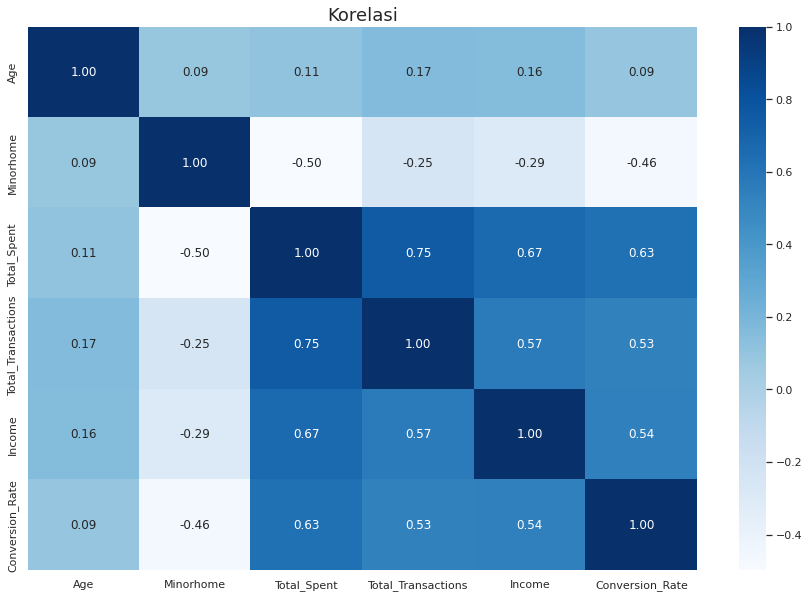

In [228]:
plt.figure(figsize=(15,10))

ax=sns.heatmap(df[['Age','Minorhome','Total_Spent','Total_Transactions','Income','Conversion_Rate']].corr(),cmap='Blues',annot=True,fmt='.2f')
ax.set_title('Korelasi',fontdict = {'fontsize':18})
plt.show()

Kolom `Income`, `Total_Spent` & `Total_Transactions` berkorelasi sedang (moderate yaitu **0.5 < r < 0.75**) terhadap kolom `Conversion_Rate`. Hal ini wajar karena menunjukkan semakin tingginya jumlah transaksi yang dilakukan customer berarti conversion rate semakin tinggi. Untuk `Income` juga selaras karena customer yang melakukan lebih banyak transaksi tentu cenderung memiliki income yang lebih besar.

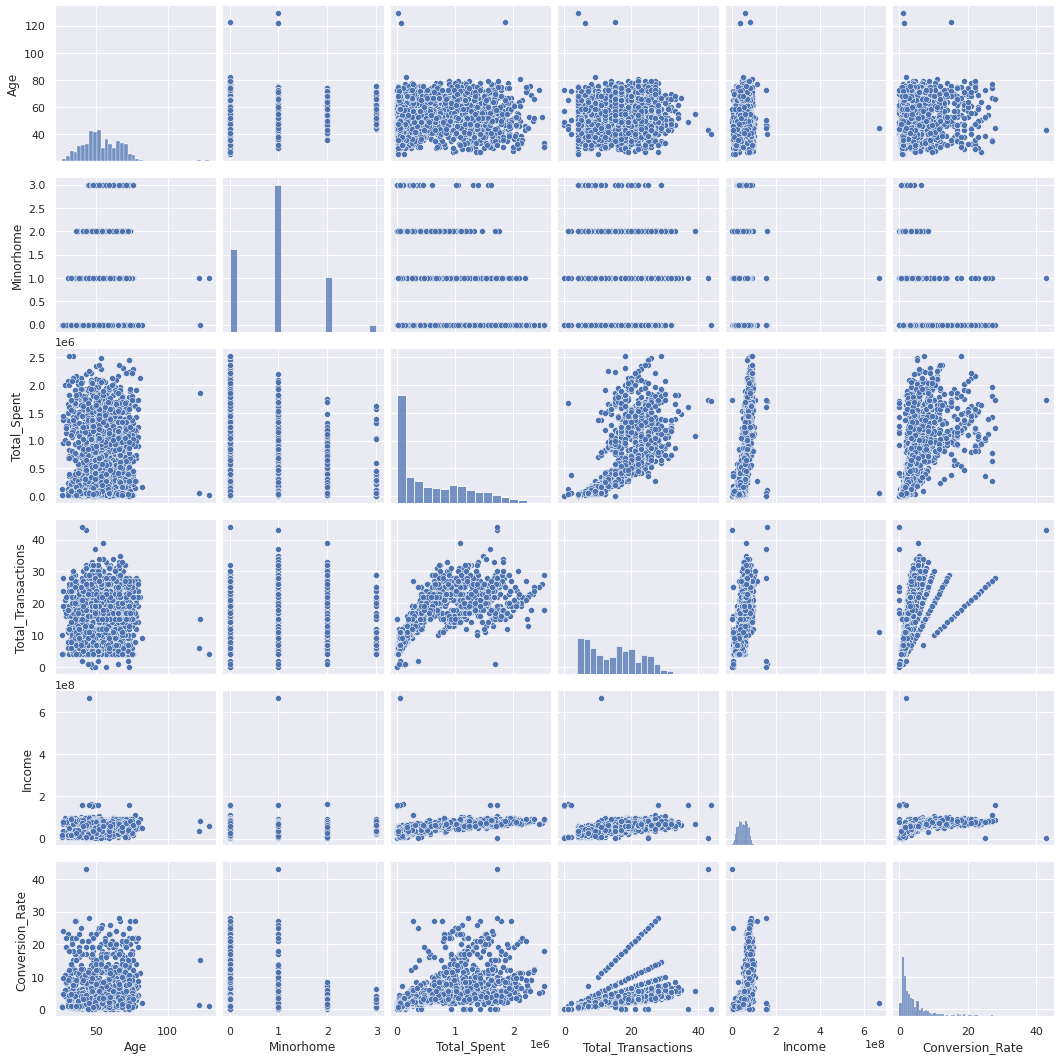

In [229]:
sns.pairplot(data=df[['Age','Minorhome','Total_Spent','Total_Transactions','Income','Conversion_Rate']])

plt.show()

Hasil pengamatan hubungan kolom lainnya terhadap `Conversion_Rate` yaitu: <br>
- Umur tidak berkorelasi atau tidak berpengaruh terhadap Conversion Rate.<br>
- Customer dengan jumlah anak-anak serumah yang lebih banyak cenderung memmiliki Conversion Rate yang lebih kecil dibanding yang tidak memiliki anak/hanya memiliki 1 anak dalam serumah.<br>
- Total_Spent dan Total_Transactions memiliki kecenderungan berbanding lurus atau pengaruh terhadap Conversion_Rate. <br>
- Income memiliki korelasi (berbanding lurus) terhadap Conversion Rate.

### Conversion Rate

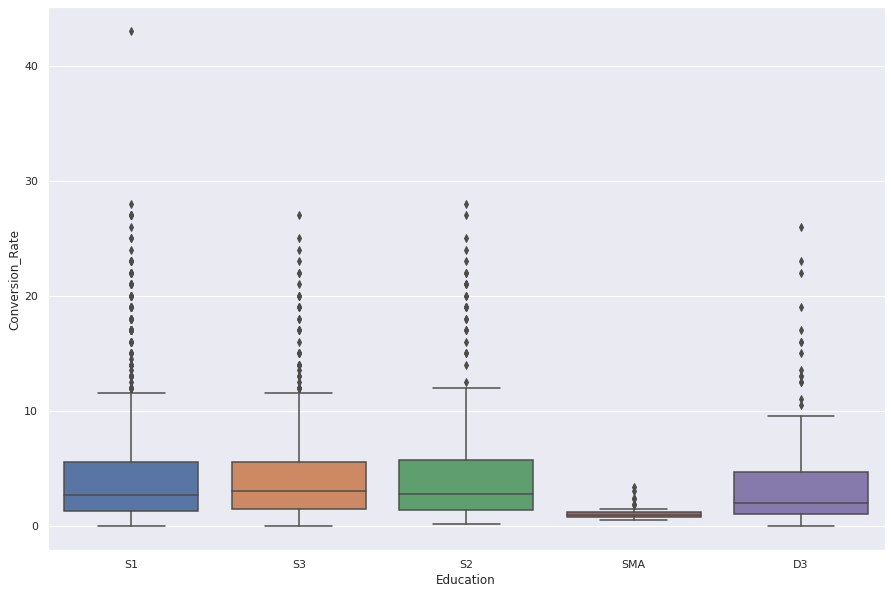

S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: Education, dtype: int64


In [230]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['Education'],y=df['Conversion_Rate'])

plt.show()
print(df['Education'].value_counts())

Sebaran Conversion Rate pada pendidikan S1 , S2 dan S3 cukup merata,sedangkan sebaran untuk pendidikan D3 lebih sempit dan SMA sangat sempit

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['Marital_Status'],y=df['Conversion_Rate'])

plt.show()
print(df['Marital_Status'].value_counts())

NameError: name 'plt' is not defined

Conversion Rate pada customer dengan status sebagai janda cenderung sedikit lebih tinggi dibanding yang lainnya. Untuk duda tidak dapat dijadikan sebagai perbandingan terhadap yang lainnya karena hanya berjumlah 3 orang.

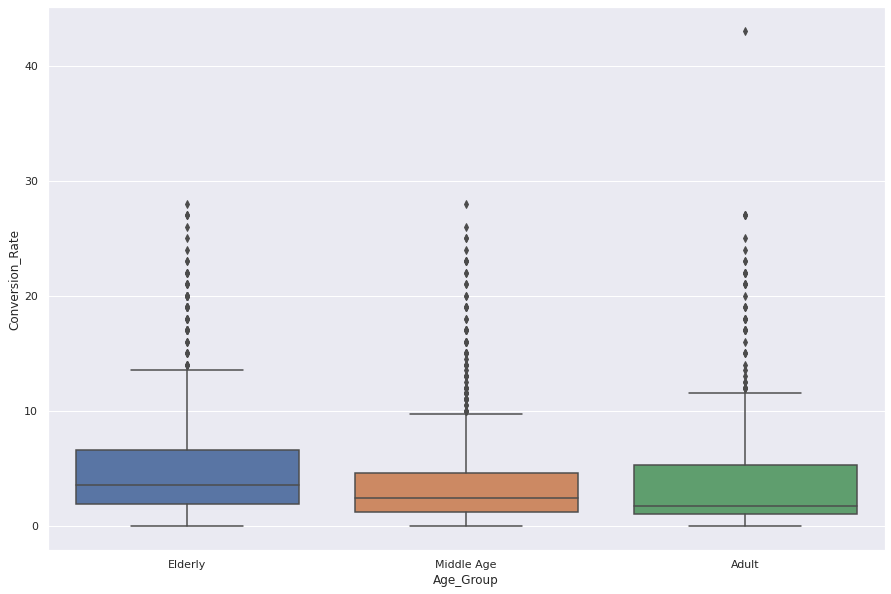

Middle Age    987
Elderly       699
Adult         554
Name: Age_Group, dtype: int64


In [232]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['Age_Group'],y=df['Conversion_Rate'])

plt.show()
print(df['Age_Group'].value_counts())

Sebaran Conversion rate pada customer kelompok Elderly (lanjut usia) sedikit lebih tinggi dibanding Adult dan kelompok Middle Age adalah kelompok yang sebaran conversion ratenya paling rendah.

### Total Transactions

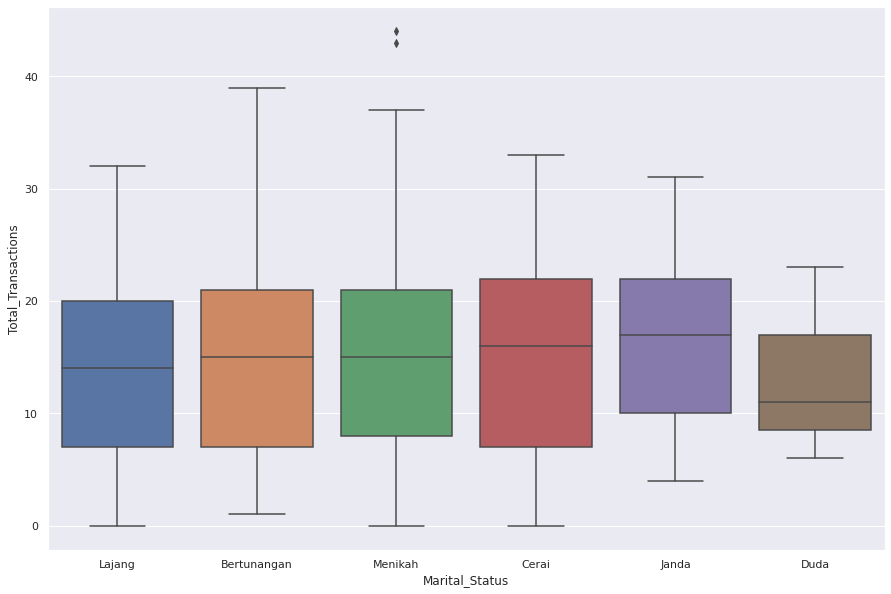

Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: Marital_Status, dtype: int64


In [233]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['Marital_Status'],y=df['Total_Transactions'])

plt.show()
print(df['Marital_Status'].value_counts())

Customer dengan status Bertunangan cenderung memiliki total transaksi yang paling tinggi dibanding customer dengan status lainnya.

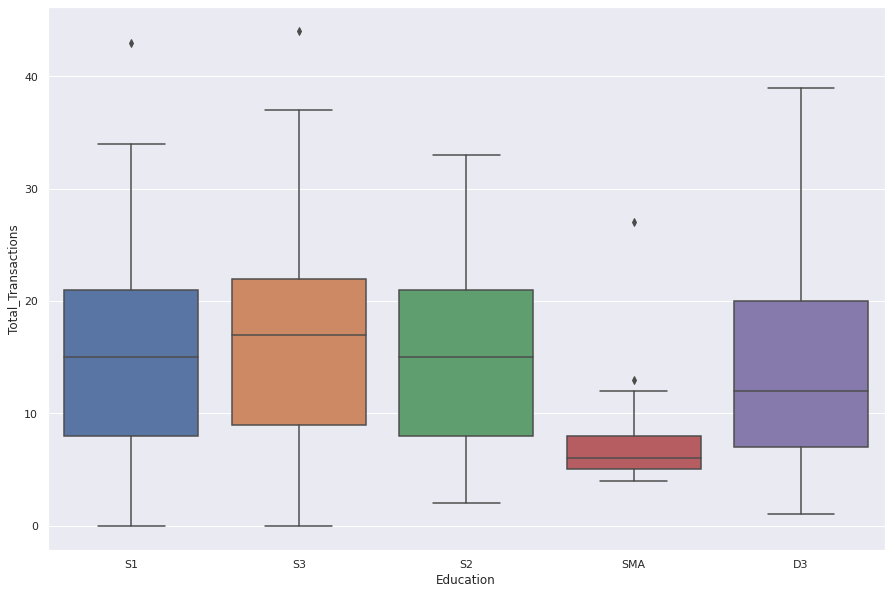

S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: Education, dtype: int64


In [234]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['Education'],y=df['Total_Transactions'])

plt.show()
print(df['Education'].value_counts())

Customer dengan latar pendidikan SMA memiliki total transaksi yang cenderung lebih kecil sedangkan customer dengan latar pendidikan D3 dan S3 cenderung memiliki total transaksi sedikit lebih tinggi dibanding S1 dan S2.

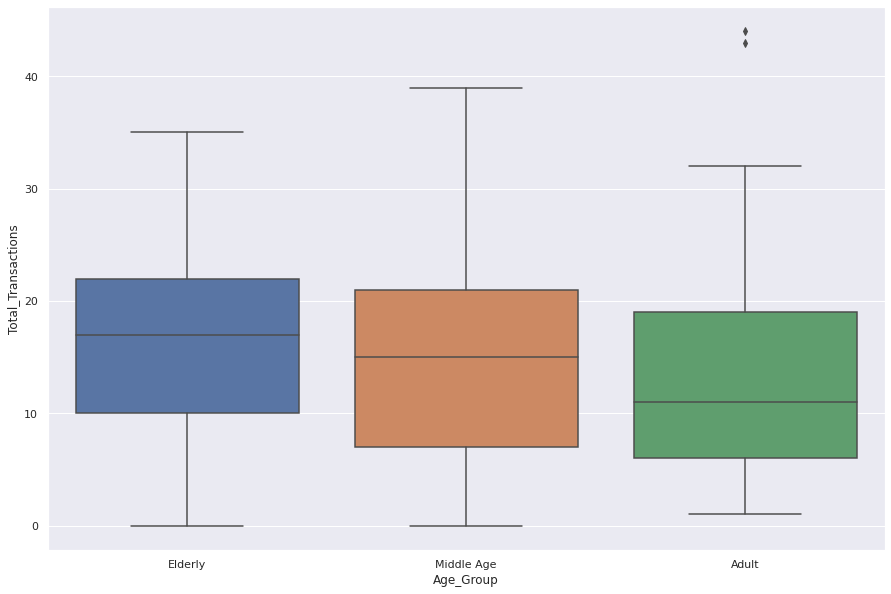

Middle Age    987
Elderly       699
Adult         554
Name: Age_Group, dtype: int64


In [235]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['Age_Group'],y=df['Total_Transactions'])

plt.show()
print(df['Age_Group'].value_counts())

Customer Middle Age memiliki total transaksi yang cenderung lebih tinggi dibanding yang lainnya.

### Products Type

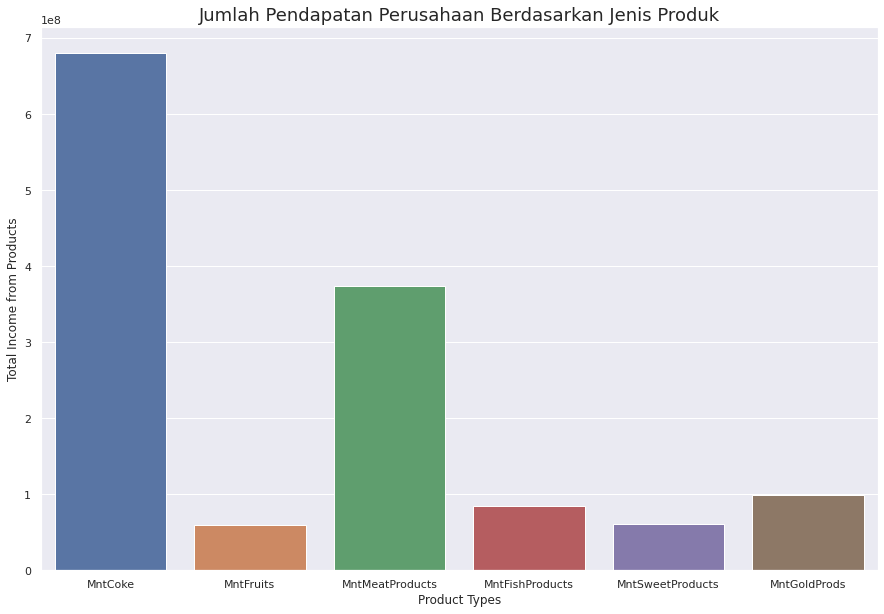

In [236]:
a = ['MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
sum = [df[x].sum() for x in a]

data_expenses = pd.DataFrame({'Product Types':a,'Total Income from Products':sum})

plt.figure(figsize=(15,10))
sns.barplot(x='Product Types',y='Total Income from Products',data=data_expenses)

plt.title('Jumlah Pendapatan Perusahaan Berdasarkan Jenis Produk',fontsize=18)
plt.show()

Jumlah pendapatan dari produk tipe cola adalah yang terbanyak dari semua produk yang ada, sedangkan jumlah pendapatan terkecil ada pada produk tipe buah dan manisan. Untuk marketing campaign selanjutnya, disarankan untuk melakukan campaign terhadap produk buah/manisan/ikan/emas karena keempat tipe produk tersebut jauh di bawah produk cola dan daging sehingga dalam rangka meningkatan revenue perusahaan, perlu adanya keseimbangan revenue masuk dari semua jenis produk yang ada. Untuk produk tipe cola dan daging tidak perlu menjadi fokus dari marketing campaign selanjutnya karena sudah cukup banyak penghasilan dari kedua produk tersebut dan sebaiknya lebih fokus kepada produk yang masih sedikit dalam memberikan revenue kepada perusahaan.

### Purchases Type

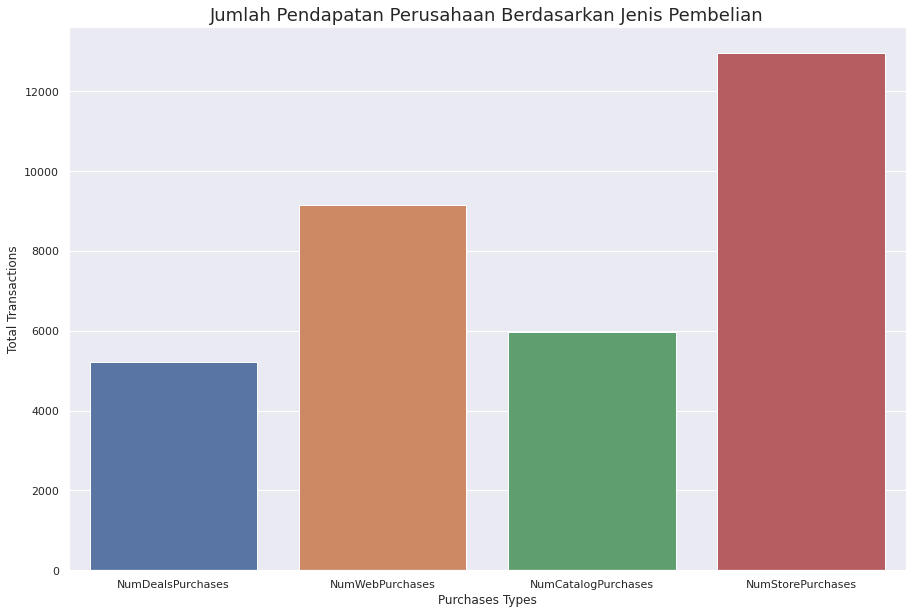

In [237]:
b = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
sum = [df[x].sum() for x in b]

data_transactions = pd.DataFrame({'Purchases Types':b,'Total Transactions':sum})

plt.figure(figsize=(15,10))
sns.barplot(x='Purchases Types',y='Total Transactions',data=data_transactions)

plt.title('Jumlah Pendapatan Perusahaan Berdasarkan Jenis Pembelian',fontsize=18)
plt.show()

Jumlah pembelian terbanyak adalah melalui store dan web. Dikarenakan kedua metode pembelian tersebut sudah cukup terkenal, maka sebaiknya diberi perhatian lebih untuk pembelian tipe Deals dan Catalog yang masih di bawah tipe Web dan Store. Rekomendasi yang dapat diberikan yaitu seperti produk Deals yang ditawarkan adalah tipe produk yang bagaimana, apakah memang dibutuhkan orang banyak atau tidak. Jika merupakan bundle, apakah isi bundle tersebut cukup menarik customer atau tidak, hal seperti itu harus dipelajari lebih lanjut. Untuk pembelian tipe Catalog, dapat diperhatikan seperti design dari catalog apakah cukup menarik customer atau tidak. 

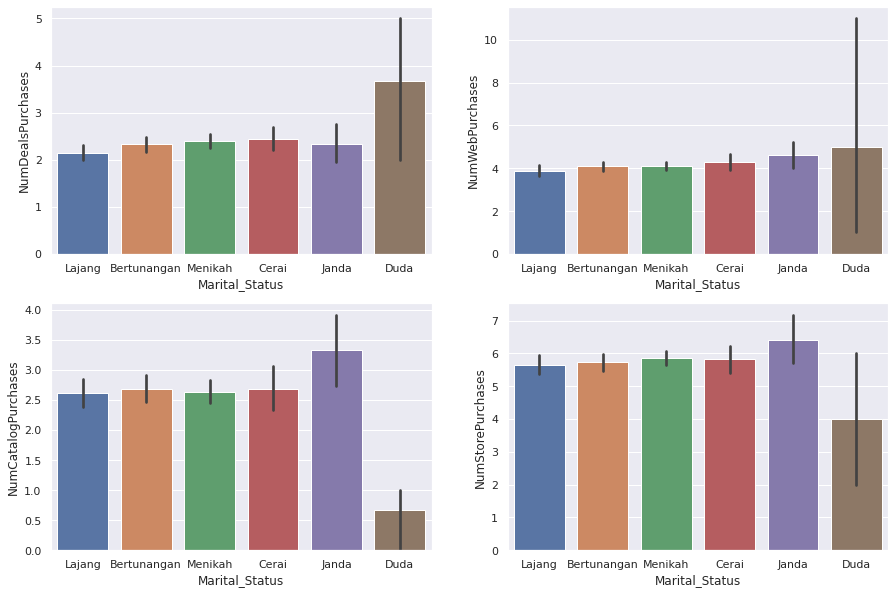

In [238]:
plt.figure(figsize=(15,10))
purchases = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']

for i in range(len(purchases)):
  plt.subplot(2,2,i+1)
  sns.barplot(x='Marital_Status',y=purchases[i],data=df)

Distribusi jumlah transaksi dari tiap metode pembelian berdasarkan Marital_Status (Status Pernikahan) cukup merata kecuali Duda.

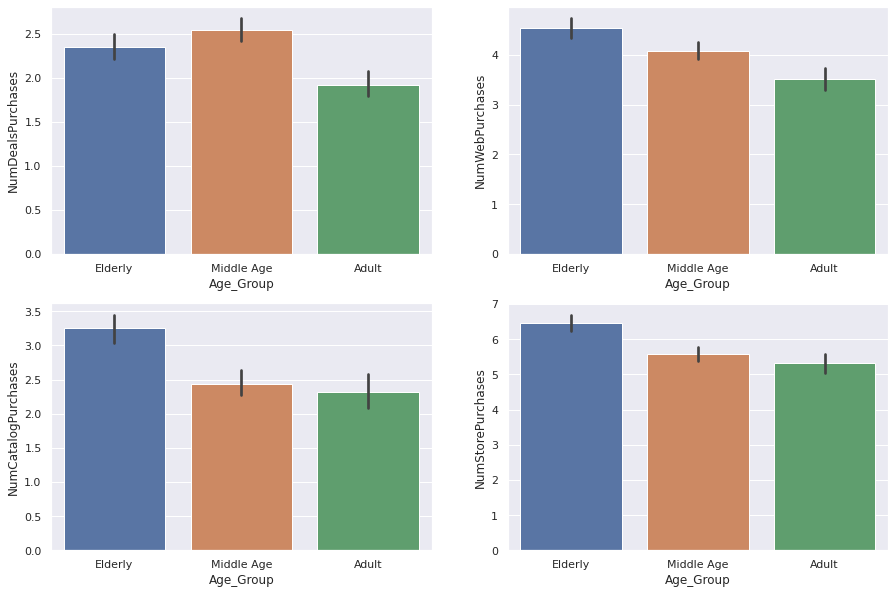

In [239]:
plt.figure(figsize=(15,10))
purchases = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']

for i in range(len(purchases)):
  plt.subplot(2,2,i+1)
  sns.barplot(x='Age_Group',y=purchases[i],data=df)

Distribusi jumlah transaksi dari tiap metode pembelian berdasarkan kelompok usia customer tidak jauh berbeda di setiap kelompok usia.

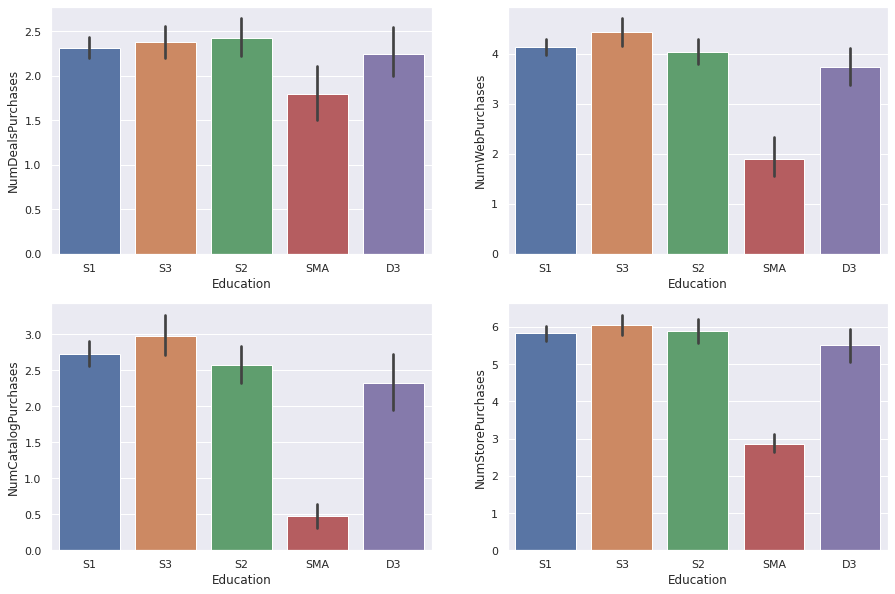

In [240]:
plt.figure(figsize=(15,10))
purchases = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']

for i in range(len(purchases)):
  plt.subplot(2,2,i+1)
  sns.barplot(x='Education',y=purchases[i],data=df)

Dapat dilihat bahwa Tingkat Pendidikan SMA selalu menjadi yang terendah dari yang lain.

### Total Accepted Campaigns

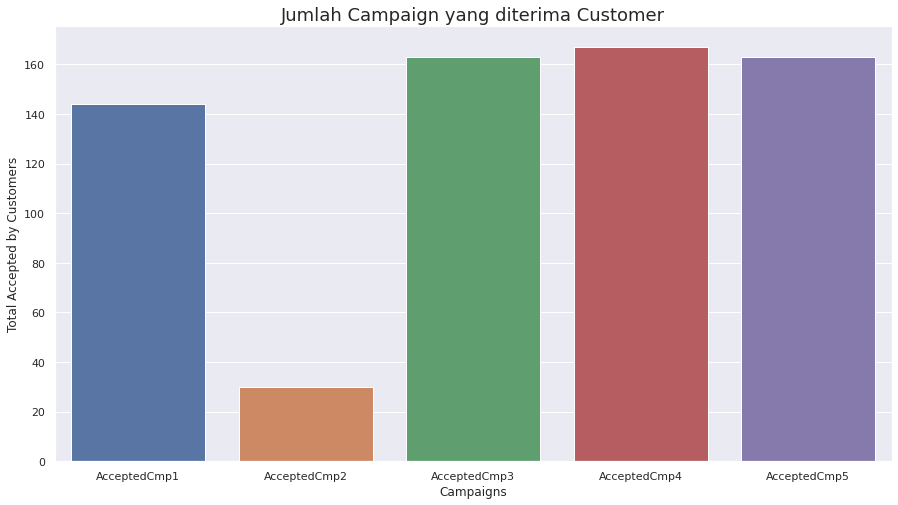

In [241]:
c = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
sum = [df[x].sum() for x in c]

data_transactions = pd.DataFrame({'Campaigns':c,'Total Accepted by Customers':sum})

plt.figure(figsize=(15,8))
sns.barplot(x='Campaigns',y='Total Accepted by Customers',data=data_transactions)

plt.title('Jumlah Campaign yang diterima Customer',fontsize=18)
plt.show()

- Jumlah customer yang menerima pada campaign kedua jauh menurun dibanding pada campaign pertama. 
- Jumlah customer yang menerima campaign ketiga naik signfikan dari campaign kedua bahkan melebihi campaign pertama.
- Jumlah customer yang menerima campaign ketiga ,keempat dan kelima cenderung cenderung sama

# Data Pre-processing

In [242]:
print(df['Z_Revenue'].unique())
print(df['Z_CostContact'].unique())

[11]
[3]


Kedua kolom ini nantinya diabaikan saja karena mengandung nilai yang sama untuk setiap baris data.

## Data Cleansing

### - Handling Missing Value

In [243]:
df_1 = df.copy()
((df_1.isna().sum())*100/len(df_1)).sort_values(ascending=False)

Income                1.07
ID                    0.00
Z_Revenue             0.00
AcceptedCmp4          0.00
AcceptedCmp5          0.00
AcceptedCmp1          0.00
AcceptedCmp2          0.00
Complain              0.00
Z_CostContact         0.00
Response              0.00
NumWebVisitsMonth     0.00
Age                   0.00
Age_Group             0.00
Minorhome             0.00
Total_Spent           0.00
Total_Transactions    0.00
Total_AcceptedCmp     0.00
AcceptedCmp3          0.00
NumStorePurchases     0.00
Year_Birth            0.00
MntCoke               0.00
Education             0.00
Marital_Status        0.00
Kidhome               0.00
Teenhome              0.00
Dt_Customer           0.00
Recency               0.00
MntFruits             0.00
NumCatalogPurchases   0.00
MntMeatProducts       0.00
MntFishProducts       0.00
MntSweetProducts      0.00
MntGoldProds          0.00
NumDealsPurchases     0.00
NumWebPurchases       0.00
Conversion_Rate       0.00
dtype: float64

Kolom yang memiliki nilai null hanya pada kolom `Income` sebesar 1.07%.<br>
Karena masih sedikit, maka nilai null akan di drop saja.

In [244]:
df_1.dropna(inplace=True)
((df_1.isna().sum())*100/len(df_1)).sort_values(ascending=False)

ID                    0.00
Year_Birth            0.00
AcceptedCmp3          0.00
AcceptedCmp4          0.00
AcceptedCmp5          0.00
AcceptedCmp1          0.00
AcceptedCmp2          0.00
Complain              0.00
Z_CostContact         0.00
Z_Revenue             0.00
Response              0.00
Age                   0.00
Age_Group             0.00
Minorhome             0.00
Total_Spent           0.00
Total_Transactions    0.00
Total_AcceptedCmp     0.00
NumWebVisitsMonth     0.00
NumStorePurchases     0.00
NumCatalogPurchases   0.00
Recency               0.00
Education             0.00
Marital_Status        0.00
Income                0.00
Kidhome               0.00
Teenhome              0.00
Dt_Customer           0.00
MntCoke               0.00
NumWebPurchases       0.00
MntFruits             0.00
MntMeatProducts       0.00
MntFishProducts       0.00
MntSweetProducts      0.00
MntGoldProds          0.00
NumDealsPurchases     0.00
Conversion_Rate       0.00
dtype: float64

### - Handling Duplicated Value

In [245]:
print('Jumlah data duplikat =',df_1.duplicated().sum())

Jumlah data duplikat = 0


### - Drop Rows with Odd Values

In [246]:
df_1[df_1['Age']>=100]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Minorhome,Total_Spent,Total_Transactions,Total_AcceptedCmp,Conversion_Rate
192,7829,1900,D3,Cerai,36640000.00,1,0,26-09-2013,99,15000,...,3,11,0,122,Elderly,1,65000,6,0,1.20
239,11004,1893,D3,Lajang,60182000.00,0,1,17-05-2014,23,8000,...,3,11,0,129,Elderly,1,22000,4,0,1.00
339,1150,1899,S3,Bertunangan,83532000.00,0,0,26-09-2013,36,755000,...,3,11,0,123,Elderly,0,1853000,15,1,15.00


Ketiga baris data tersebut dihapus saja karena sepertinya telah terjadi kesalahan input data umur.

In [247]:
df_1 = df_1[df_1['Age']<100]

## Feature Encoding

In [248]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2213 non-null   int64  
 1   Year_Birth           2213 non-null   int64  
 2   Education            2213 non-null   object 
 3   Marital_Status       2213 non-null   object 
 4   Income               2213 non-null   float64
 5   Kidhome              2213 non-null   int64  
 6   Teenhome             2213 non-null   int64  
 7   Dt_Customer          2213 non-null   object 
 8   Recency              2213 non-null   int64  
 9   MntCoke              2213 non-null   int64  
 10  MntFruits            2213 non-null   int64  
 11  MntMeatProducts      2213 non-null   int64  
 12  MntFishProducts      2213 non-null   int64  
 13  MntSweetProducts     2213 non-null   int64  
 14  MntGoldProds         2213 non-null   int64  
 15  NumDealsPurchases    2213 non-null   i

`Education` -> Label Encoding<br>
`Marital_Status` -> One Hot Encoding<br>
`Age_Group` -> One Hot Encoding

### - Label Encoding

In [249]:
mapping_education = {
    'SMA': 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}
df_1['Education'] = df_1['Education'].map(mapping_education)

In [250]:
df_1['Education'].unique()

array([2, 4, 3, 0, 1])

### - One Hot Encoding

In [251]:
encoder_MS = pd.get_dummies(df_1['Marital_Status'],prefix='Marital_Status')

In [252]:
encoder_AG = pd.get_dummies(df_1['Age_Group'],prefix='Age_Group')

In [253]:
df_1 = df_1.join(encoder_MS)

In [254]:
df_1 = df_1.join(encoder_AG)

In [255]:
df_1 = df_1.drop(['Marital_Status','Age_Group'],axis=1) #drop kolom awal

In [256]:
df_1.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,Conversion_Rate,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,Age_Group_Adult,Age_Group_Elderly,Age_Group_Middle Age
0,5524,1957,2,58138000.00,0,0,04-09-2012,58,635000,88000,...,3.57,0,0,0,0,1,0,0,1,0
1,2174,1954,2,46344000.00,1,1,08-03-2014,38,11000,1000,...,1.20,0,0,0,0,1,0,0,1,0
2,4141,1965,2,71613000.00,0,0,21-08-2013,26,426000,49000,...,5.25,1,0,0,0,0,0,0,0,1
3,6182,1984,2,26646000.00,1,0,10-02-2014,26,11000,4000,...,1.33,1,0,0,0,0,0,1,0,0
4,5324,1981,4,58293000.00,1,0,19-01-2014,94,173000,43000,...,3.80,0,0,0,0,0,1,1,0,0


In [257]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213 entries, 0 to 2239
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2213 non-null   int64  
 1   Year_Birth                  2213 non-null   int64  
 2   Education                   2213 non-null   int64  
 3   Income                      2213 non-null   float64
 4   Kidhome                     2213 non-null   int64  
 5   Teenhome                    2213 non-null   int64  
 6   Dt_Customer                 2213 non-null   object 
 7   Recency                     2213 non-null   int64  
 8   MntCoke                     2213 non-null   int64  
 9   MntFruits                   2213 non-null   int64  
 10  MntMeatProducts             2213 non-null   int64  
 11  MntFishProducts             2213 non-null   int64  
 12  MntSweetProducts            2213 non-null   int64  
 13  MntGoldProds                2213 

## Feature Transformation (Standardization)

In [258]:
df_std = df_1.copy()

Feature yang distandardisasi yaitu:<br>
Income, Kidhome, Teenhome, Recency, MntCoke, MntFruit, MntMeatProducts, MntFishProducts, MntSweetproducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Age, Minorhome, Total_Spent, Total_Transactions, Total_AcceptedCmp, Conversion_Rate


In [259]:
from sklearn.preprocessing import StandardScaler

col = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
       'NumWebVisitsMonth', 'Age', 'Minorhome', 'Total_Spent', 'Total_Transactions', 'Total_AcceptedCmp', 'Conversion_Rate']
#untuk semua feature numerik
for i in col:
    df_std[i] = StandardScaler().fit_transform(df_1[i].values.reshape(len(df_1),1))

In [260]:
df_std[col].head()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Minorhome,Total_Spent,Total_Transactions,Total_AcceptedCmp,Conversion_Rate
0,0.23,-0.82,-0.93,0.31,0.98,1.55,1.69,2.45,1.48,0.85,...,1.43,2.50,-0.56,0.69,1.02,-1.26,1.68,1.32,-0.44,-0.17
1,-0.23,1.04,0.91,-0.38,-0.87,-0.64,-0.72,-0.65,-0.63,-0.73,...,-1.13,-0.57,-1.17,-0.13,1.28,1.40,-0.96,-1.16,-0.44,-0.65
2,0.77,-0.82,-0.93,-0.80,0.36,0.57,-0.18,1.34,-0.15,-0.04,...,1.43,-0.23,1.29,-0.55,0.33,-1.26,0.28,0.80,-0.44,0.18
3,-1.02,1.04,-0.93,-0.80,-0.87,-0.56,-0.66,-0.50,-0.59,-0.75,...,-0.76,-0.91,-0.56,0.28,-1.29,0.07,-0.92,-0.90,-0.44,-0.63
4,0.24,1.04,-0.93,1.55,-0.39,0.42,-0.22,0.15,-0.00,-0.56,...,0.33,0.11,0.06,-0.13,-1.03,0.07,-0.31,0.54,-0.44,-0.12


#MODELING (CUSTOMERS SEGMENTATION)

In [261]:
df_std.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,Conversion_Rate,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,Age_Group_Adult,Age_Group_Elderly,Age_Group_Middle Age
0,5524,1957,2,0.23,-0.82,-0.93,04-09-2012,0.31,0.98,1.55,...,-0.17,0,0,0,0,1,0,0,1,0
1,2174,1954,2,-0.23,1.04,0.91,08-03-2014,-0.38,-0.87,-0.64,...,-0.65,0,0,0,0,1,0,0,1,0
2,4141,1965,2,0.77,-0.82,-0.93,21-08-2013,-0.80,0.36,0.57,...,0.18,1,0,0,0,0,0,0,0,1
3,6182,1984,2,-1.02,1.04,-0.93,10-02-2014,-0.80,-0.87,-0.56,...,-0.63,1,0,0,0,0,0,1,0,0
4,5324,1981,4,0.24,1.04,-0.93,19-01-2014,1.55,-0.39,0.42,...,-0.12,0,0,0,0,0,1,1,0,0


In [262]:
df_std.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213 entries, 0 to 2239
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2213 non-null   int64  
 1   Year_Birth                  2213 non-null   int64  
 2   Education                   2213 non-null   int64  
 3   Income                      2213 non-null   float64
 4   Kidhome                     2213 non-null   float64
 5   Teenhome                    2213 non-null   float64
 6   Dt_Customer                 2213 non-null   object 
 7   Recency                     2213 non-null   float64
 8   MntCoke                     2213 non-null   float64
 9   MntFruits                   2213 non-null   float64
 10  MntMeatProducts             2213 non-null   float64
 11  MntFishProducts             2213 non-null   float64
 12  MntSweetProducts            2213 non-null   float64
 13  MntGoldProds                2213 

In [263]:
df_std.drop(['ID','Year_Birth','Dt_Customer','Z_CostContact','Z_Revenue','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'],axis=1,inplace=True)

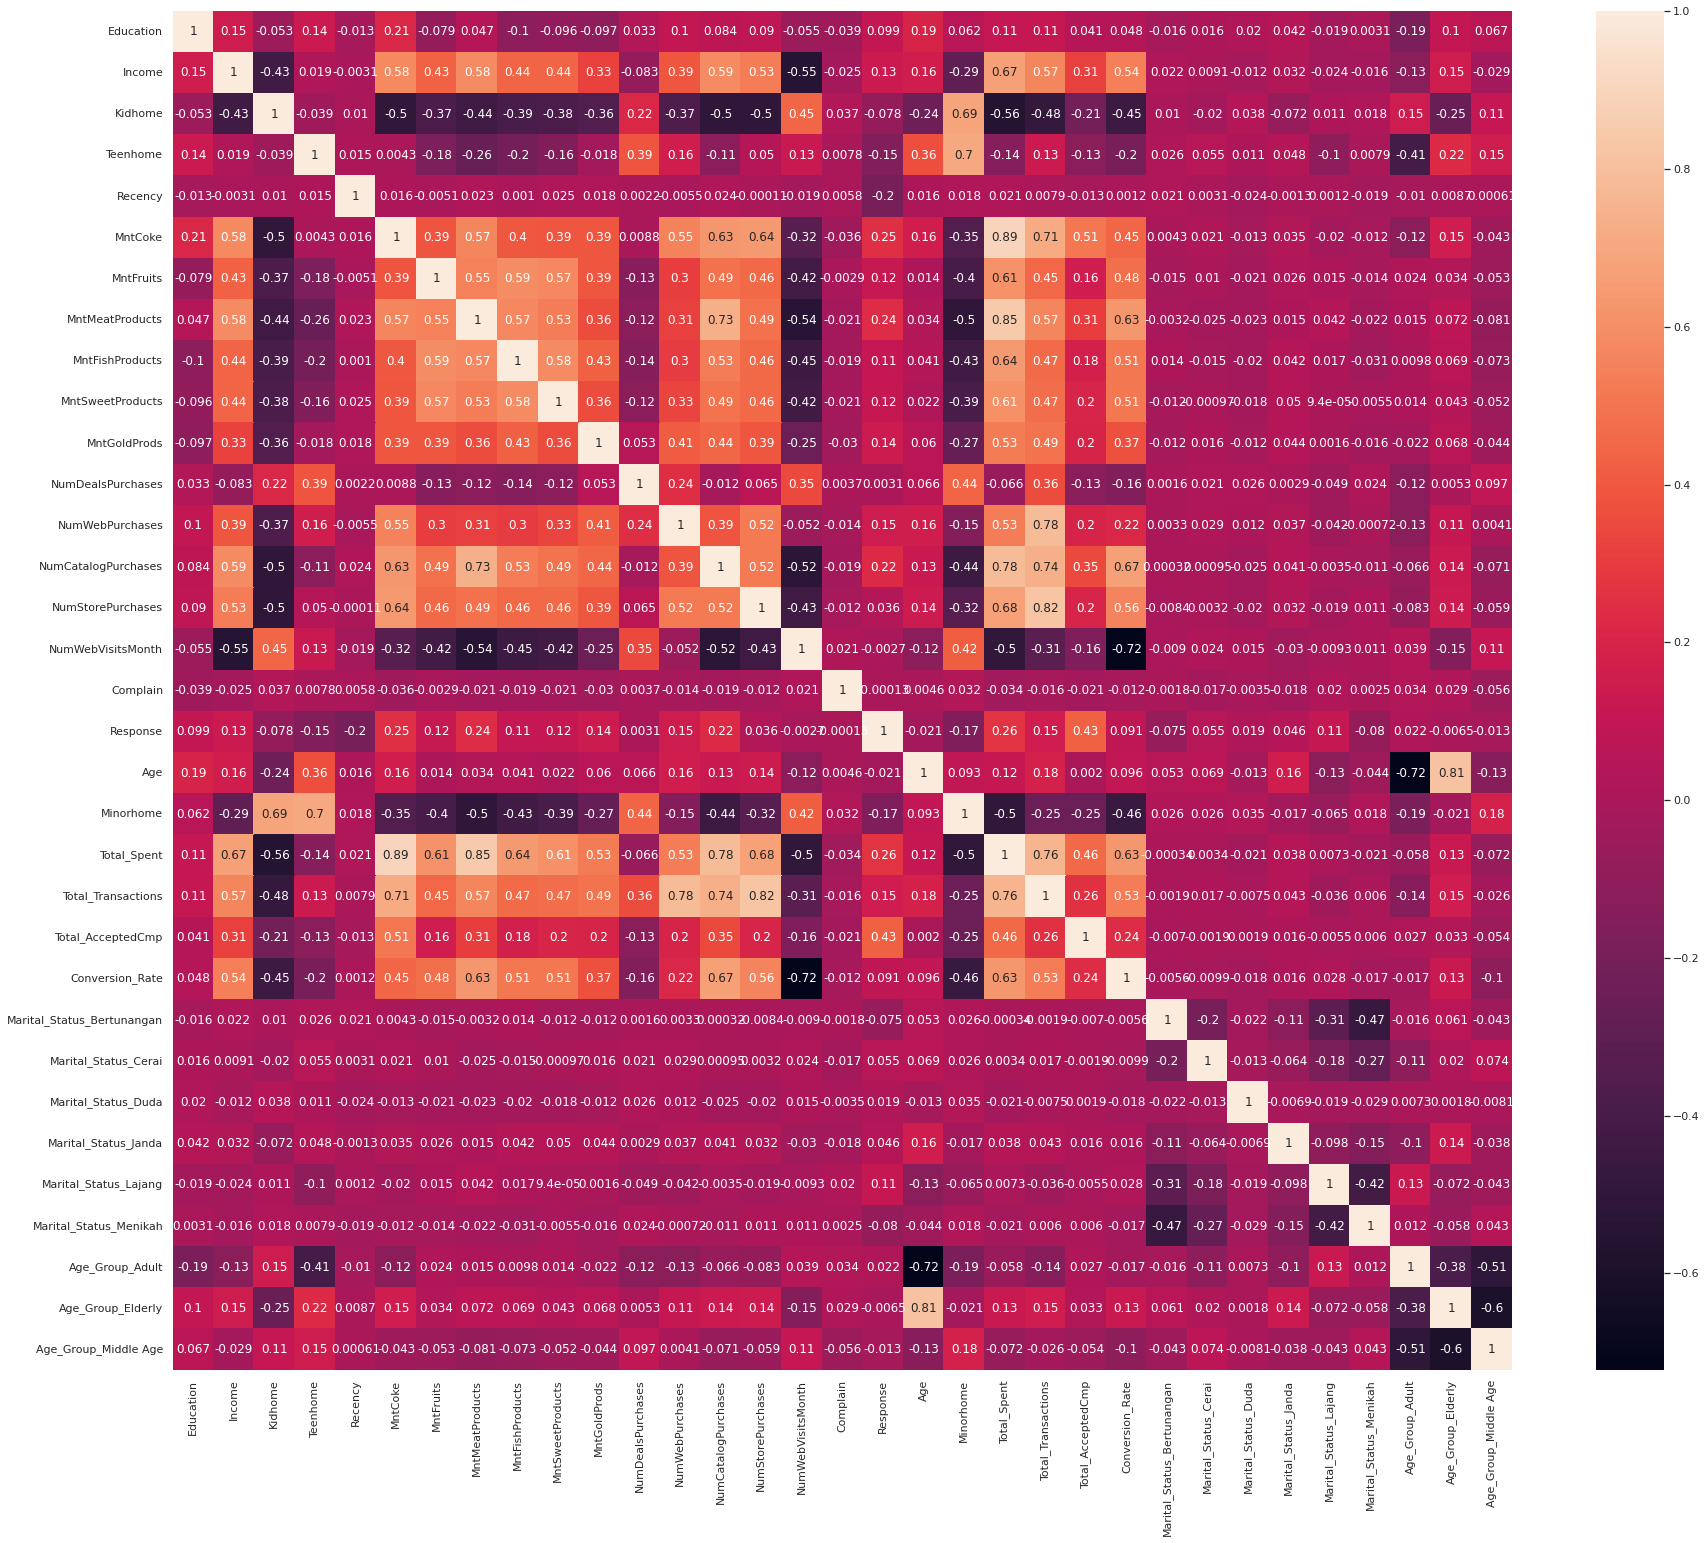

In [264]:
plt.figure(figsize=(30,25))
sns.heatmap(df_std.corr(),annot=True)
plt.show()

## Elbow Method (Find k in K-Means Clustering)

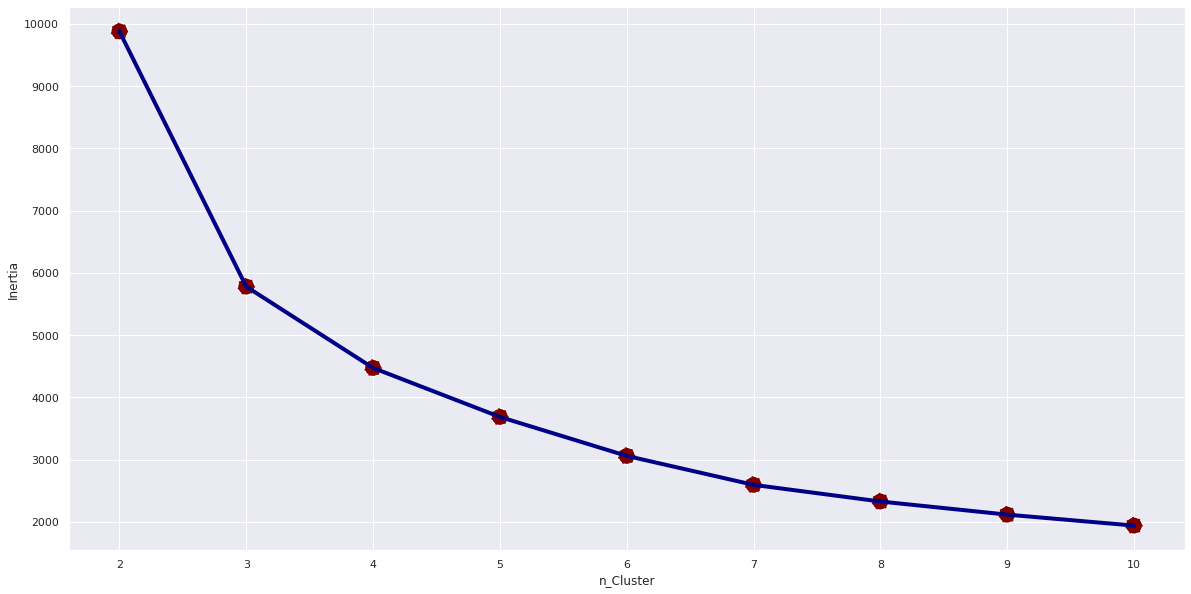

In [265]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Y_pca = pca.fit_transform(df_std)

inertia = []

for i in range (2,11):
  kmeans = KMeans(n_clusters=i, random_state=7, init='k-means++')
  kmeans.fit(Y_pca)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(20,10))
sns.lineplot(x=range(2,11),y=inertia,color='#000087',linewidth=4)
sns.scatterplot(x=range(2,11),y=inertia,s=300,color='#800000',linestyle='--')
plt.xlabel('n_Cluster')
plt.ylabel('Inertia')
sns.set_theme()

Jumlah cluster yang akan digunakan adalah 4 karena setelah itu nilai inertia turun tidak begitu signifikan lagi.

## Silhouette Score

### - Euclidean

In [266]:
from sklearn.metrics import silhouette_score

euclidean = []
for i in range(2,11):
  kmeans = KMeans(n_clusters=i).fit(Y_pca)
  preds = kmeans.predict(Y_pca)

  score_euclidean = silhouette_score(Y_pca,preds,metric='euclidean')
  euclidean.append(score_euclidean)

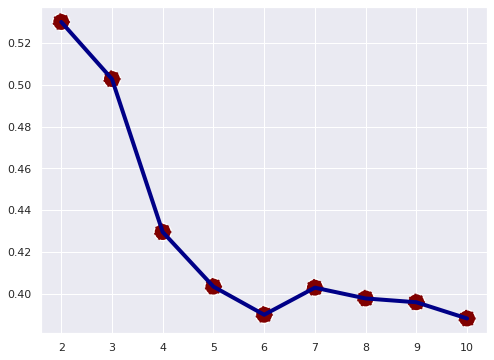

In [267]:
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=range(2,11), y=euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=euclidean, s=300, color='#800000',  linestyle='--')

plt.show()

Dapat terlihat bahwa pada jumlah cluster = 3, hasil masih bagus.

### - Mahalanobis

In [268]:
mahalanobis = []

for i in range(2,11):
  kmeans = KMeans(n_clusters=i).fit(Y_pca)
  preds = kmeans.predict(Y_pca)

  score_mahalanobis = silhouette_score(Y_pca,preds,metric='mahalanobis')
  mahalanobis.append(score_mahalanobis)

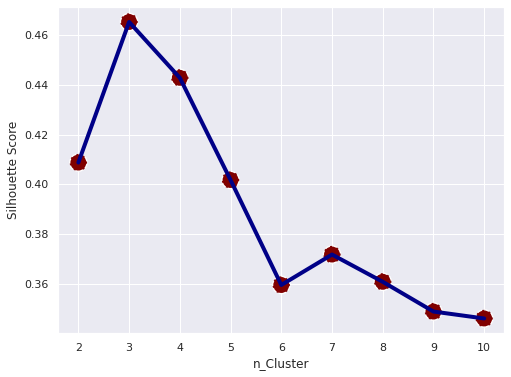

In [269]:
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=range(2,11), y=mahalanobis, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=mahalanobis, s=300, color='#800000',  linestyle='--')

plt.xlabel('n_Cluster')
plt.ylabel('Silhouette Score')
plt.show()

Pada perhitungan silhouette score dengan metode pengukuran Mahalanobis distance karena masih terdapat beberapa kolom kategorikal yang memiliki nilai range yang berbeda dengan nilai numerik yang telah distandarisasi. 
Dapat terlihat bahwa untuk jumlah cluster 5 memiliki nilai score diatas 0.4.

## Clustering

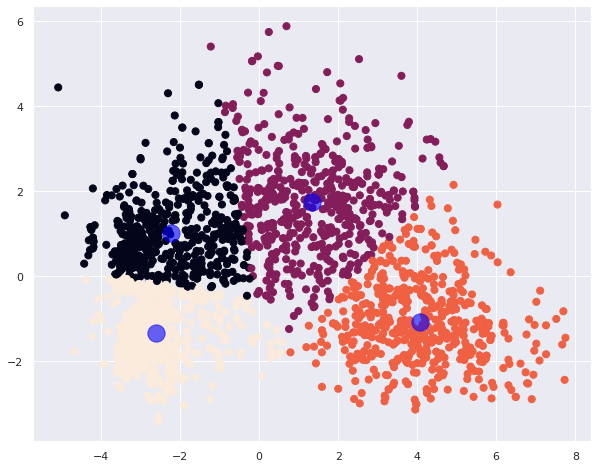

In [270]:
kmeans = KMeans(n_clusters=4, random_state=7, init='k-means++')

train = kmeans.fit(Y_pca)
predict = kmeans.predict(Y_pca)
df_cluster = df_std.copy()
df_cluster = df_cluster.assign(K_Cluster = predict)
targets = [0,1,2,3]

plt.figure(figsize=(10,8))
plt.scatter(Y_pca[:,0],Y_pca[:,1],c=predict,s=50)

centers2 = train.cluster_centers_

plt.scatter(centers2[:,0], centers2[:,1],c='blue',s=300,alpha = 0.6)
plt.show()

## Cluster Group

In [271]:
df_label = df_std.assign(K_Cluster=kmeans.labels_)

In [272]:
df_label.head()

,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,Age_Group_Adult,Age_Group_Elderly,Age_Group_Middle Age,K_Cluster
0,2,0.23,-0.82,-0.93,0.31,0.98,1.55,1.69,2.45,1.48,...,0,0,0,0,1,0,0,1,0,2
1,2,-0.23,1.04,0.91,-0.38,-0.87,-0.64,-0.72,-0.65,-0.63,...,0,0,0,0,1,0,0,1,0,0
2,2,0.77,-0.82,-0.93,-0.80,0.36,0.57,-0.18,1.34,-0.15,...,1,0,0,0,0,0,0,0,1,2
3,2,-1.02,1.04,-0.93,-0.80,-0.87,-0.56,-0.66,-0.50,-0.59,...,1,0,0,0,0,0,1,0,0,3
4,4,0.24,1.04,-0.93,1.55,-0.39,0.42,-0.22,0.15,-0.00,...,0,0,0,0,0,1,1,0,0,0


In [273]:
df_group = df_label.groupby(['K_Cluster']).mean().reset_index()
df_group['count'] = pd.value_counts(df_label['K_Cluster'])
df_group

,K_Cluster,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,Age_Group_Adult,Age_Group_Elderly,Age_Group_Middle Age,count
0,0,2.72,-0.37,0.59,0.84,-0.00,-0.59,-0.54,-0.57,-0.56,...,0.26,0.13,0.00,0.03,0.19,0.39,0.06,0.41,0.53,515
1,1,2.70,0.37,-0.49,0.78,0.02,0.69,0.11,0.03,0.03,...,0.26,0.12,0.00,0.05,0.17,0.40,0.09,0.44,0.48,521
2,2,2.43,1.01,-0.77,-0.75,-0.00,0.91,1.04,1.33,1.14,...,0.26,0.09,0.00,0.04,0.25,0.35,0.31,0.37,0.33,528
3,3,2.08,-0.82,0.56,-0.69,-0.01,-0.82,-0.51,-0.65,-0.51,...,0.26,0.08,0.00,0.02,0.24,0.40,0.48,0.08,0.44,649


In [274]:
df_group.iloc[:,:20]

,K_Cluster,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age
0,0,2.72,-0.37,0.59,0.84,-0.00,-0.59,-0.54,-0.57,-0.56,-0.54,-0.45,0.44,-0.33,-0.60,-0.55,0.44,0.01,0.09,0.38
1,1,2.70,0.37,-0.49,0.78,0.02,0.69,0.11,0.03,0.03,0.09,0.46,0.63,0.95,0.36,0.77,0.07,0.01,0.13,0.40
2,2,2.43,1.01,-0.77,-0.75,-0.00,0.91,1.04,1.33,1.14,1.06,0.63,-0.60,0.34,1.15,0.81,-1.11,0.01,0.29,0.00
3,3,2.08,-0.82,0.56,-0.69,-0.01,-0.82,-0.51,-0.65,-0.51,-0.50,-0.53,-0.37,-0.77,-0.74,-0.84,0.49,0.01,0.10,-0.62


In [275]:
df_group.iloc[:,20:]

,Minorhome,Total_Spent,Total_Transactions,Total_AcceptedCmp,Conversion_Rate,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,Age_Group_Adult,Age_Group_Elderly,Age_Group_Middle Age,count
0,1.03,-0.70,-0.47,-0.29,-0.50,0.26,0.13,0.00,0.03,0.19,0.39,0.06,0.41,0.53,515
1,0.21,0.45,0.96,0.02,0.03,0.26,0.12,0.00,0.05,0.17,0.40,0.09,0.44,0.48,521
2,-1.10,1.30,0.75,0.65,1.25,0.26,0.09,0.00,0.04,0.25,0.35,0.31,0.37,0.33,528
3,-0.10,-0.86,-1.01,-0.32,-0.64,0.26,0.08,0.00,0.02,0.24,0.40,0.48,0.08,0.44,649


In [276]:
df_group[['K_Cluster','Income','Kidhome','Teenhome','Minorhome','Total_Spent','Total_Transactions','Total_AcceptedCmp','NumDealsPurchases']]

,K_Cluster,Income,Kidhome,Teenhome,Minorhome,Total_Spent,Total_Transactions,Total_AcceptedCmp,NumDealsPurchases
0,0,-0.37,0.59,0.84,1.03,-0.70,-0.47,-0.29,0.44
1,1,0.37,-0.49,0.78,0.21,0.45,0.96,0.02,0.63
2,2,1.01,-0.77,-0.75,-1.10,1.30,0.75,0.65,-0.60
3,3,-0.82,0.56,-0.69,-0.10,-0.86,-1.01,-0.32,-0.37


Berdasarkan rata-rata Income, Minorhome, Total_Spent, Total_Transactions maka ketiga cluster kelompok tersebut dapat dibagi menjadi:<br>
- 0 -> Low Income, Most Likely to Have Minors at Home (Kids and Teens), Low Spending, Low Transactions. -> Low Spender<br>
- 1 -> Medium Income, Likely to Have Minors at Home (Mostly Teens), Medium Spending, High Transactions (This Group Has a Very High Amount of Purchase on Deals). -> Medium Spender<br>
- 2 -> High Income, Most Unikely to Have Minors at Home, High Spending, High Transactions -> High Spender<br>
- 3 -> Very Low Income, Likely to Have Minors at Home (Mostly Kids), Very Low Spending, Very Low Transactions. -> Risk of Churn

# EDA OF CLUSTER GROUP

In [277]:
df_group['K_Cluster'] = df_group['K_Cluster'].replace([0],'Low Spender')
df_group['K_Cluster'] = df_group['K_Cluster'].replace([1],'Medium Spender')
df_group['K_Cluster'] = df_group['K_Cluster'].replace([2],'High Spender')
df_group['K_Cluster'] = df_group['K_Cluster'].replace([3],'Risk of Churn')

In [280]:
df_group.head()

,K_Cluster,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,Age_Group_Adult,Age_Group_Elderly,Age_Group_Middle Age,count
0,Low Spender,2.72,-0.37,0.59,0.84,-0.00,-0.59,-0.54,-0.57,-0.56,...,0.26,0.13,0.00,0.03,0.19,0.39,0.06,0.41,0.53,515
1,Medium Spender,2.70,0.37,-0.49,0.78,0.02,0.69,0.11,0.03,0.03,...,0.26,0.12,0.00,0.05,0.17,0.40,0.09,0.44,0.48,521
2,High Spender,2.43,1.01,-0.77,-0.75,-0.00,0.91,1.04,1.33,1.14,...,0.26,0.09,0.00,0.04,0.25,0.35,0.31,0.37,0.33,528
3,Risk of Churn,2.08,-0.82,0.56,-0.69,-0.01,-0.82,-0.51,-0.65,-0.51,...,0.26,0.08,0.00,0.02,0.24,0.40,0.48,0.08,0.44,649


## Jumlah Customer

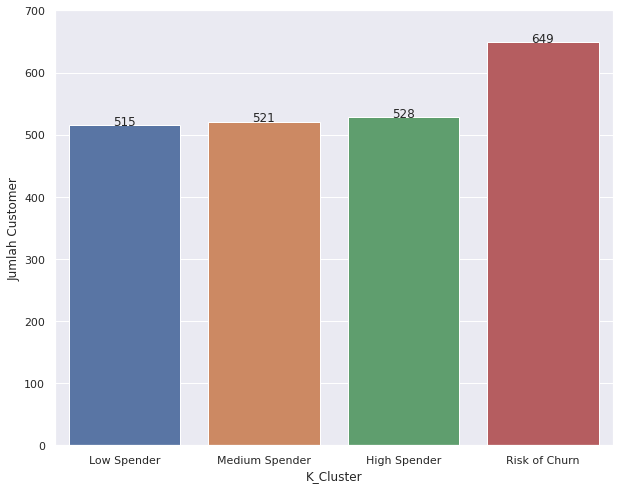

In [289]:
plt.figure(figsize=(10,8))

ax=sns.barplot(x='K_Cluster',y='count',data=df_group)
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, df_group['count'][i],ha="center")

plt.ylabel('Jumlah Customer')
plt.ylim(0,700)
plt.show()

Marketing campaign  harus berfokus pada  Risk of Churn karena kelompok ini yang terbanyak dibandingkan kelompok lainnya yaitu 649 customer.
#### Business Recommendations :
- Risk of Churn -> Fokus memberikan promo (baik diskon ataupun cashback) kepada kelompok ini dan dapat lebih didalami lagi karakteristik customer di cluster ini karena kelompok ini yang akan menjadi target marketing campaign.
- High, Medium dan Low Spender -> Untuk  kelompok ini, promo diberikan untuk kondisi-kondisi tertentu saja, sebagai contoh perayaan hari tertentu.


## Income vs Conversion Rate

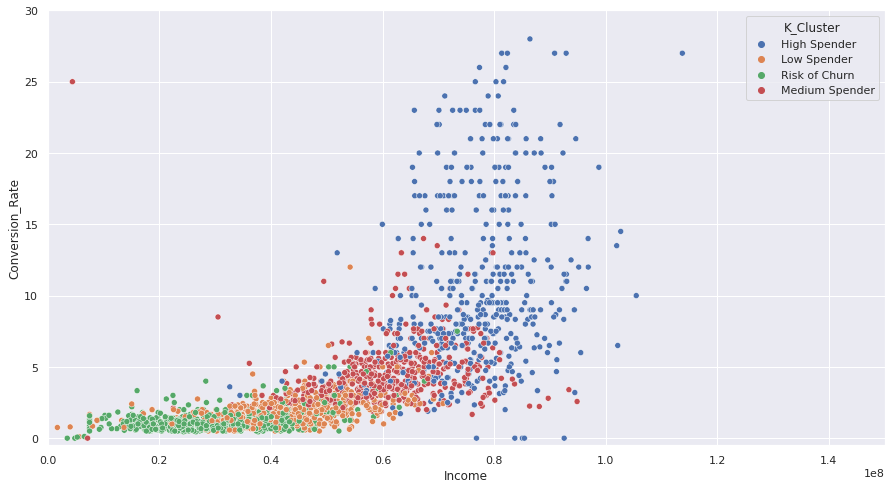

In [313]:
plt.figure(figsize=(15,8))

sns.scatterplot(x='Income',y='Conversion_Rate',hue='K_Cluster',data=df_1)
plt.ylim(-0.5,30)
plt.xlim(0,150000000)
plt.show()

#### Income berkorelasi dengan Conversion Rate. 

Kelompok High Spender memiliki Income dan Conversion rate yang cenderung paling besar, disusul oleh Medium Spender, Low Spender dan paling rendah adalah yang berada pada kelompok Risk of Churn. 

##### Business Recommendations :
Dapat memberikan promo tanggal tertentu seperti akhir bulan atau awal bulan saat customer umumnya gajian.


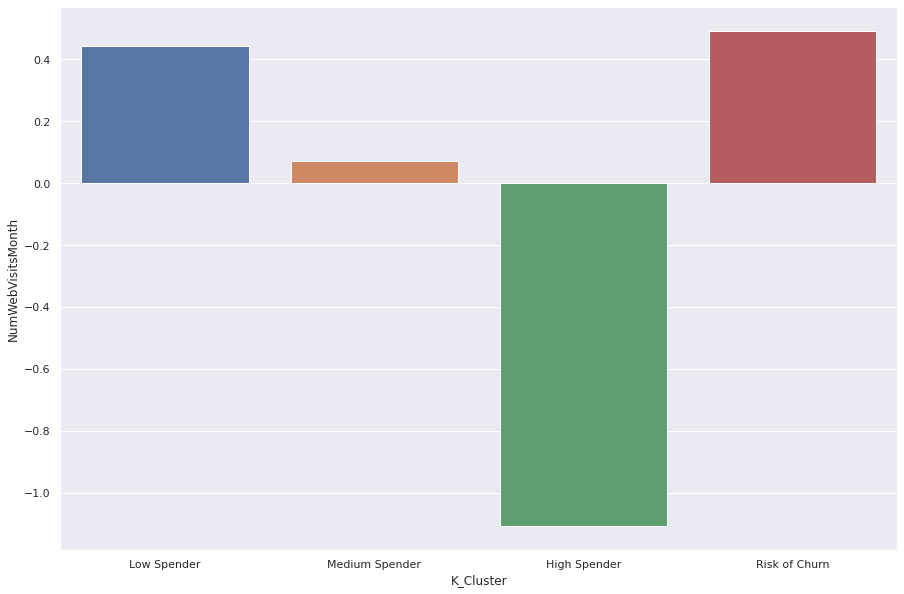

In [314]:
plt.figure(figsize=(15,10))

sns.barplot(x=df_group['K_Cluster'],y=df_group['NumWebVisitsMonth'])
plt.show()

Kelompok Risk of Churn adalah yang paling sering mengunjungi website, maka kita fokus menawarkan kepada customer di kelompok tersebut

## Income vs Total Spent

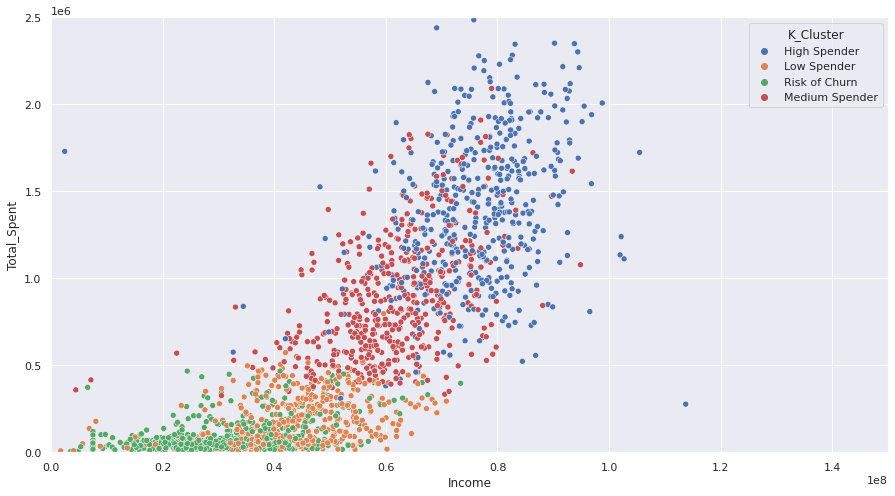

In [340]:
plt.figure(figsize=(15,8))

sns.scatterplot(x='Income',y='Total_Spent',hue='K_Cluster',data=df_1)

plt.ylim(0,2500000)
plt.xlim(0,150000000)
plt.show()

#### Income berkorelasi dengan Total Spend

Kelompok High Spender dan medium Spender memiliki Income dan Total Spend yang cenderung paling besar, disusul Low Spender dan paling rendah adalah yang berada pada kelompok Risk of Churn. 

#### Business Recommendations :
Dapat memberikan promo tanggal tertentu seperti akhir bulan atau awal bulan saat customer umumnya gajian.


## Total Minors vs Conversion Rate

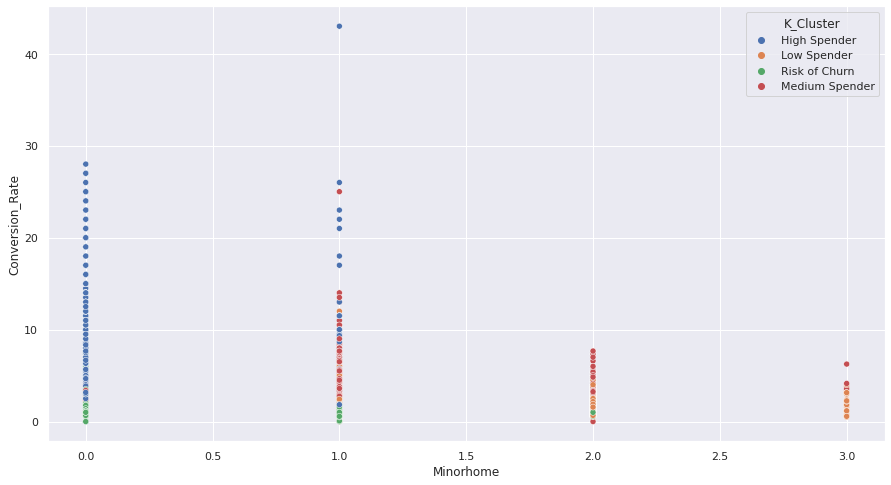

In [320]:
plt.figure(figsize=(15,8))

sns.scatterplot(x='Minorhome',y='Conversion_Rate',hue='K_Cluster',data=df_1)

plt.show()

Semakin sedikit minors (anak) di rumah, maka conversion rate customer akan semakin tinggi 

kebanyakan dari kelompok High Spender tidak memiliki atau hanya memiliki 1 anak. Rekomendasi bisnis yang dapat diberikan yaitu karena minimnya conversion rate untuk customer yang memiliki 2 anak atau lebih,

Business Recommendations :
menambah produk-produk seperti perlengkapan anak atau mainan untuk menarik perhatian customer yang memiliki anak.


## Karakteristik per Cluster Group

### Minorhome

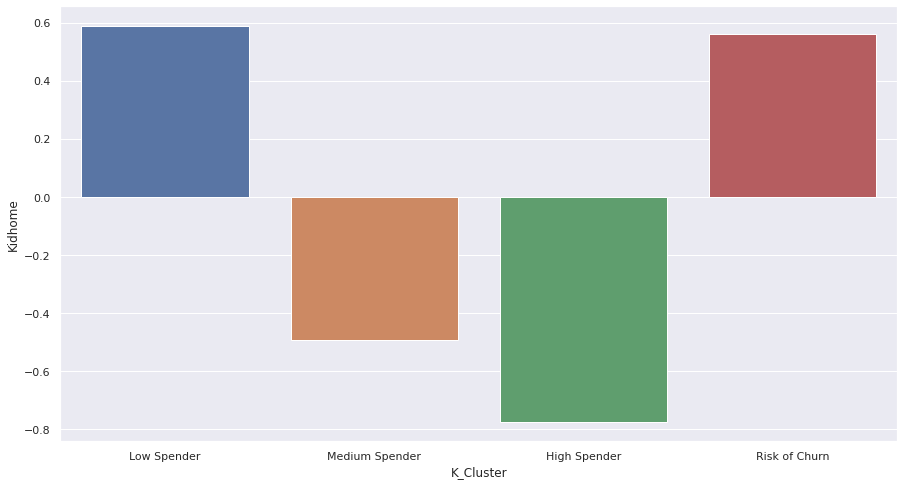

In [321]:
plt.figure(figsize=(15,8))

sns.barplot(x='K_Cluster',y='Kidhome',data=df_group)

plt.show()

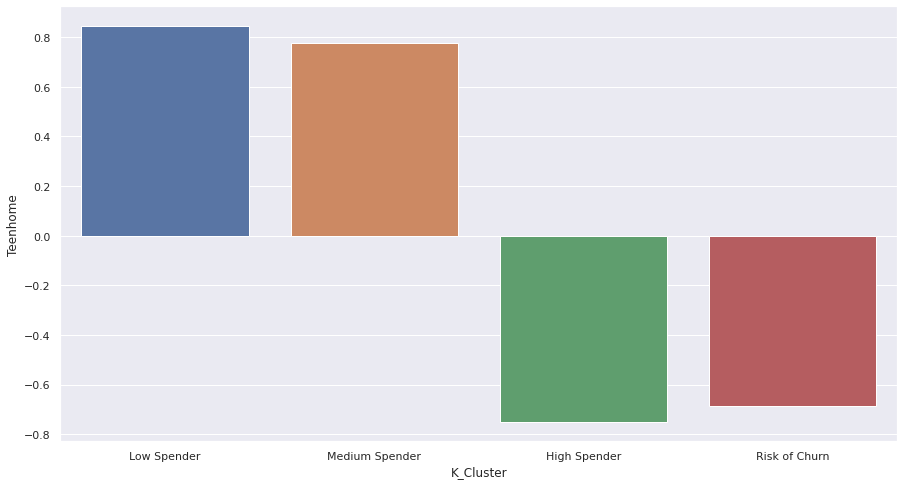

In [322]:
plt.figure(figsize=(15,8))

sns.barplot(x='K_Cluster',y='Teenhome',data=df_group)

plt.show()

Rekomendasi bisnis untuk kelompok cluster:<br>
- Risk of Churn -> memberikan rekomendasi produk perlengkapan anak.<br>
- Low Spender -> memberikan rekomendasi produk anak dan remaja.<br>
- Medium Spender -> memberikan rekomendasi produk remaja.<br>
- High Spender -> mengurangi/tidak rekomendasi produk anak.

### Purchases

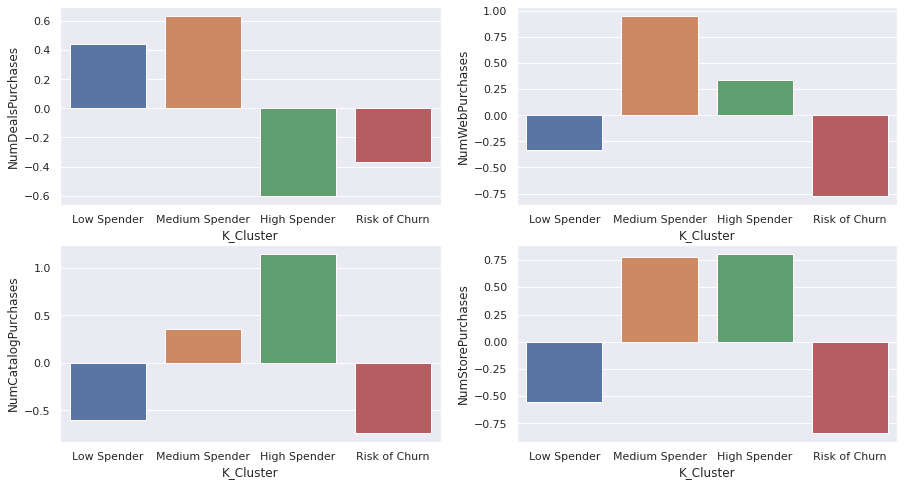

In [331]:
plt.figure(figsize=(15,8))
b = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']


for i in range(len(b)):
  plt.subplot(2,2,i+1)
  sns.barplot(x='K_Cluster',y=b[i],data=df_group)

Business Recommendations :
Membuat skema bundle product untuk produk-produk yang sering dibeli atau dicari oleh customer
